<h1 ><span style="color:blue">Capstone Project - Hotel Cancellations</span></h1>

***INDEX***
1. [Problem Statement](#Problem-Statement)
2. [Importing Libraries](#Importing-Libraries)
3. [Data loading](#Data-Loading)
4. [Data Information](#Data-Information)
5. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
6. [Data Reloading](#Data-Reloading)
7. [Model 1](#Model-1:-Logistic-regression)
8. [Model 2](#Model-2:-Linear-discriminant-Analysis)
9.[Model 3](#Model-3:-KNN-model)
10.[Model 4](#Model-4:-Naive-Bayes)
11.[Model 5](#Model-5:-Decision-Tree)
12.[Model 6](#Model-6:-Linear-Support-Vector-Classifier)
13.[Model 7](#Model-7:-Artificial-Neural-Network)
14.[Model 8](#Model-8:-Random-Forest)
15.[Model 9](#Model-9:-Bagging-Classifier)
16.[Model 10](#Model-10:-Gradient-Boosting-Classifier)
17.[Tuned Model 1](#Model-Tuning)
18.[Feature Importance](#Feature-Importance)

## Problem Statement

This dataset consists of guest booking information of one of the world’s major leading chain of hotels, homes and spaces. The information given should be used to build some predictive models to classify whether a hotel booking is likely to be canceled, which can affect the revenue stream and help in planning the overbooking levels.

### Importing Libraries

In [1]:
# importing standard libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score, recall_score, roc_curve,RocCurveDisplay, plot_confusion_matrix, confusion_matrix,classification_report, precision_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import joblib


from sklearn.impute import SimpleImputer
pd.set_option('display.max_columns', None)

import datetime as dt

import warnings 
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

C:\Users\HP\anaconda3\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
# pip install sidetable
import sidetable as stb

### Data Loading

In [3]:
# Load the data from the Excel file
file_path = 'OriginalDataset_hotel_revenue_historical_full-2.xlsx'
data_2018 = pd.read_excel(file_path, sheet_name='2018')
data_2019 = pd.read_excel(file_path, sheet_name='2019')
data_2020 = pd.read_excel(file_path, sheet_name='2020')

# Combine data from all three years into a single dataframe
df = pd.concat([data_2018, data_2019, data_2020], ignore_index=True)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2018-05-06
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2018-04-22
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,2018-06-23
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,107.0,0,2,Canceled,2018-05-11
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,NaN,NaN,0,Transient,108.3,0,2,Canceled,2018-05-29


In [4]:
# Merge the arrival date columns into a new column 'arrival_date'
df['arrival_date'] = pd.to_datetime(df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].astype(str).agg('-'.join, axis=1))

# Calculate the booking date
df['booking_date'] = df['arrival_date'] - pd.to_timedelta(df['lead_time'], unit='d')

# Drop the original arrival date columns
df.drop(columns=['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'arrival_date_week_number', 'lead_time'], inplace=True)

# revised df
df.head()


,hotel,is_canceled,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,booking_date
0,Resort Hotel,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2018-05-06,2018-07-01,2018-04-07
1,Resort Hotel,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2018-04-22,2018-07-01,2018-04-17
2,Resort Hotel,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,2018-06-23,2018-07-01,2018-06-08
3,Resort Hotel,1,2,5,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,107.0,0,2,Canceled,2018-05-11,2018-07-01,2018-05-02
4,Resort Hotel,1,2,8,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,NaN,NaN,0,Transient,108.3,0,2,Canceled,2018-05-29,2018-07-01,2018-03-27


### Data Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141947 entries, 0 to 141946
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           141947 non-null  object        
 1   is_canceled                     141947 non-null  int64         
 2   stays_in_weekend_nights         141947 non-null  int64         
 3   stays_in_week_nights            141947 non-null  int64         
 4   adults                          141947 non-null  int64         
 5   children                        141939 non-null  float64       
 6   babies                          141947 non-null  int64         
 7   meal                            141947 non-null  object        
 8   country                         141322 non-null  object        
 9   market_segment                  141947 non-null  object        
 10  distribution_channel            141947 non-null  object 

In [6]:
df.isna().sum()

hotel                                  0
is_canceled                            0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               8
babies                                 0
meal                                   0
country                              625
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              19555
company                           133822
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special

In [7]:
values = {"agent": "No_Agent", "company": "No_Company"}
df[['agent', 'company']]=df[['agent', 'company']].fillna(value = values)
df[['agent', 'company']]

,agent,company
0,240.0,No_Company
1,15.0,No_Company
2,240.0,No_Company
3,240.0,No_Company
4,No_Agent,No_Company
...,...,...
141942,No_Agent,153.0
141943,No_Agent,No_Company
141944,No_Agent,450.0
141945,No_Agent,238.0


In [8]:
#convert some numerical to categorical column names of data frame in a list
Cat_col_names = list(df[['agent', 'company','is_canceled', 'is_repeated_guest']])
print("\nNames of columns to be converted into categorical")
print(Cat_col_names)


Names of columns to be converted into categorical
['agent', 'company', 'is_canceled', 'is_repeated_guest']


In [9]:
# loop to change each column to category type
for col in Cat_col_names:
    df[col] = df[col].astype(str)

# using apply method
df[['booking_date', 'arrival_date']] = df[['booking_date', 'arrival_date']].apply(pd.to_datetime)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141947 entries, 0 to 141946
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           141947 non-null  object        
 1   is_canceled                     141947 non-null  object        
 2   stays_in_weekend_nights         141947 non-null  int64         
 3   stays_in_week_nights            141947 non-null  int64         
 4   adults                          141947 non-null  int64         
 5   children                        141939 non-null  float64       
 6   babies                          141947 non-null  int64         
 7   meal                            141947 non-null  object        
 8   country                         141322 non-null  object        
 9   market_segment                  141947 non-null  object        
 10  distribution_channel            141947 non-null  object 

In [10]:
print("First booking Date recorded is : {}." .format(df['booking_date'].min().strftime('%d-%m-%Y')))
print("Last booking Date recorded is : {}." .format(df['booking_date'].max().strftime('%d-%m-%Y')))

First booking Date recorded is : 24-06-2016.
Last booking Date recorded is : 31-08-2020.


In [11]:
print("First arrival Date recorded is : {}." .format(df['arrival_date'].min().strftime('%d-%m-%Y')))
print("Last arrival Date recorded is : {}." .format(df['arrival_date'].max().strftime('%d-%m-%Y')))

First arrival Date recorded is : 01-07-2018.
Last arrival Date recorded is : 31-08-2020.


In [12]:
### imputing the country columns 
# the country column we will fill it with the most frequent value of the column 

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent',verbose=0)
imputer= imputer.fit(df[['country']].iloc[:,:])

df['country']=imputer.transform(df[['country']])
df.isna().sum()

hotel                             0
is_canceled                       0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          8
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date           0
arrival_date                

In [13]:
df['is_canceled'].value_counts(normalize=True)

#The data is imbalanced therefore the accuracy score along with f1 score for cancelled class need to be considered as evaluation matrix score 

0    0.627755
1    0.372245
Name: is_canceled, dtype: float64

In [14]:
df.describe().T


# there's 0 adult and 0 children in the data as well we will have to do a deeper analysis on this with the business.
# as it is impossible to have a booking with 0 adult and 0 children we will be dropping this anomaly. 
# Company and agent columns have unique ID's which are considered as numerical.

,count,mean,std,min,25%,50%,75%,max
stays_in_weekend_nights,141947.0,0.927557,1.000817,0.00,0.00,1.00,2.0,19.0
stays_in_week_nights,141947.0,2.495509,1.909784,0.00,1.00,2.00,3.0,50.0
adults,141947.0,1.852551,0.628553,0.00,2.00,2.00,2.0,55.0
children,141939.0,0.097401,0.388549,0.00,0.00,0.00,0.0,10.0
babies,141947.0,0.008285,0.100520,0.00,0.00,0.00,0.0,10.0
previous_cancellations,141947.0,0.125413,1.059631,0.00,0.00,0.00,0.0,26.0
previous_bookings_not_canceled,141947.0,0.120327,1.381798,0.00,0.00,0.00,0.0,72.0
booking_changes,141947.0,0.213939,0.636479,0.00,0.00,0.00,0.0,21.0
days_in_waiting_list,141947.0,2.305565,16.938253,0.00,0.00,0.00,0.0,391.0
adr,141947.0,99.416916,49.675549,-6.38,65.75,90.95,123.0,5400.0


In [15]:
df.describe(include = 'O').T

# almost half of the booking were made from portugal 
# in this case type_1 hotel is more favored compared to type_2 hotel
# there is a discrepancy of reserved room type and assigned room type 
# hotel might have room that's not sold to the public 
# no deposit here might have a reason why cancellation is high (since customer will not have anything to lose in this no deposit case)
# most popular room is room type A (we need to check it with the ADR which room type has the average daily rate and what it has to do with the popularity )


,count,unique,top,freq
hotel,141947,2,City Hotel,93103
is_canceled,141947,2,0,89108
meal,141947,5,BB,109878
country,141947,177,PRT,63009
market_segment,141947,8,Online TA,62840
distribution_channel,141947,5,TA/TO,116042
is_repeated_guest,141947,2,0,137495
reserved_room_type,141947,10,A,104124
assigned_room_type,141947,12,A,88864
deposit_type,141947,3,No Deposit,123396


In [16]:
df['guests'] = df['adults'] + df['children'] + df['babies']
df.head()

# total guest of the hotel booking by adding the babies children and babies

,hotel,is_canceled,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,booking_date,guests
0,Resort Hotel,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,No_Company,0,Transient,82.0,0,1,Canceled,2018-05-06,2018-07-01,2018-04-07,2.0
1,Resort Hotel,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,No_Company,0,Transient,105.5,0,0,Canceled,2018-04-22,2018-07-01,2018-04-17,2.0
2,Resort Hotel,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,No_Company,0,Transient,123.0,0,0,Canceled,2018-06-23,2018-07-01,2018-06-08,2.0
3,Resort Hotel,1,2,5,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,No_Company,0,Transient,107.0,0,2,Canceled,2018-05-11,2018-07-01,2018-05-02,2.0
4,Resort Hotel,1,2,8,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,No_Agent,No_Company,0,Transient,108.3,0,2,Canceled,2018-05-29,2018-07-01,2018-03-27,2.0


In [17]:
# since it's impossible to have 0 guests to book a hotel room, unless they are pseudo rooms reserved by the hotel itself
df[df['guests'] == 0]

,hotel,is_canceled,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,booking_date,guests
2838,City Hotel,1,2,0,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1.0,No_Company,0,Transient-Party,0.00,0,0,Canceled,2018-09-05,2018-09-06,2018-09-05,0.0
9366,Resort Hotel,0,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,No_Agent,174.0,0,Transient-Party,0.00,0,0,Check-Out,2018-10-06,2018-10-06,2018-10-05,0.0
9482,Resort Hotel,0,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,No_Agent,174.0,0,Transient,0.00,0,0,Check-Out,2018-10-12,2018-10-12,2018-10-12,0.0
9991,Resort Hotel,0,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,No_Company,0,Transient-Party,0.00,0,0,Check-Out,2018-11-23,2018-11-20,2018-10-15,0.0
10253,Resort Hotel,0,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,No_Company,122,Transient-Party,0.00,0,0,Check-Out,2019-01-04,2018-12-30,2018-07-18,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137239,City Hotel,0,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,No_Company,0,Transient,100.80,0,0,Check-Out,2020-06-30,2020-06-27,2020-03-12,0.0
137301,City Hotel,0,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,No_Agent,No_Company,0,Transient,0.00,1,1,Check-Out,2020-07-01,2020-06-30,2020-06-29,0.0
138461,City Hotel,0,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,No_Company,0,Transient,73.80,0,0,Check-Out,2020-07-17,2020-07-15,2020-06-01,0.0
138744,City Hotel,0,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,No_Company,0,Transient-Party,22.86,0,1,Check-Out,2020-07-22,2020-07-15,2020-07-13,0.0


In [18]:
# we will be dropping such rows as they will not be usefule for our analysis.

df.drop(labels = df[df['guests'] == 0].index, axis = 0, inplace = True)
df[df['guests'] == 0]

,hotel,is_canceled,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,booking_date,guests


In [19]:
#create a new column with total stay nights including both weekend and weekday.

df['total_stays'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df.head()

,hotel,is_canceled,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,booking_date,guests,total_stays
0,Resort Hotel,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,No_Company,0,Transient,82.0,0,1,Canceled,2018-05-06,2018-07-01,2018-04-07,2.0,3
1,Resort Hotel,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,No_Company,0,Transient,105.5,0,0,Canceled,2018-04-22,2018-07-01,2018-04-17,2.0,3
2,Resort Hotel,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,No_Company,0,Transient,123.0,0,0,Canceled,2018-06-23,2018-07-01,2018-06-08,2.0,4
3,Resort Hotel,1,2,5,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,No_Company,0,Transient,107.0,0,2,Canceled,2018-05-11,2018-07-01,2018-05-02,2.0,7
4,Resort Hotel,1,2,8,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,No_Agent,No_Company,0,Transient,108.3,0,2,Canceled,2018-05-29,2018-07-01,2018-03-27,2.0,10


In [20]:
df[df['total_stays'] == 0]

# It has been observed that certain reservations (645 rows) have 0 total stay nights which implies arrival date 
# and departure date is same and quite possible for business meetings. Hence we will not drop such rows.

,hotel,is_canceled,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,booking_date,guests,total_stays
7951,Resort Hotel,0,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,No_Agent,No_Company,0,Transient,0.0,0,0,Check-Out,2018-07-01,2018-07-01,2017-07-24,2.0,0
7952,Resort Hotel,0,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,No_Agent,No_Company,0,Transient,0.0,0,0,Check-Out,2018-07-01,2018-07-01,2016-06-24,2.0,0
8082,Resort Hotel,0,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,H,0,No Deposit,240.0,No_Company,0,Transient,0.0,0,2,Check-Out,2018-07-06,2018-07-06,2018-03-17,2.0,0
8083,Resort Hotel,0,0,0,1,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,H,0,No Deposit,250.0,No_Company,0,Transient,0.0,0,0,Check-Out,2018-07-06,2018-07-06,2018-07-06,1.0,0
8107,Resort Hotel,0,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,No_Agent,No_Company,0,Transient,0.0,0,1,Check-Out,2018-07-07,2018-07-07,2018-06-29,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139910,City Hotel,0,0,0,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,1,0,0,A,A,0,No Deposit,262.0,No_Company,0,Transient,0.0,0,0,Check-Out,2020-08-08,2020-08-08,2020-08-08,2.0,0
140238,City Hotel,0,0,0,2,0.0,0,BB,PRT,Direct,Direct,1,0,0,A,A,0,No Deposit,No_Agent,No_Company,0,Transient,0.0,0,0,Check-Out,2020-08-14,2020-08-14,2020-08-14,2.0,0
140840,City Hotel,0,0,0,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,K,7,No Deposit,98.0,No_Company,0,Transient-Party,0.0,0,0,Check-Out,2020-08-23,2020-08-23,2020-06-06,1.0,0
141172,City Hotel,0,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,No_Agent,No_Company,0,Transient,0.0,0,0,Check-Out,2020-08-27,2020-08-27,2020-08-26,2.0,0


#### Lead Time Calculation

Since the're are many unique values in the lead time we will group it into months before we do analysis on those so hopefully we can see a trend from binning lead time into months

In [21]:
df['arrival_date'] = df['arrival_date'].dt.strftime('%d-%m-%Y')
df['booking_date'] = df['booking_date'].dt.strftime('%d-%m-%Y')

In [22]:


df['lead_time'] = (pd.to_datetime(df['arrival_date']) - pd.to_datetime(df['booking_date'])).dt.days
df.head()

,hotel,is_canceled,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,booking_date,guests,total_stays,lead_time
0,Resort Hotel,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,No_Company,0,Transient,82.0,0,1,Canceled,2018-05-06,01-07-2018,07-04-2018,2.0,3,-178
1,Resort Hotel,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,No_Company,0,Transient,105.5,0,0,Canceled,2018-04-22,01-07-2018,17-04-2018,2.0,3,-100
2,Resort Hotel,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,No_Company,0,Transient,123.0,0,0,Canceled,2018-06-23,01-07-2018,08-06-2018,2.0,4,-211
3,Resort Hotel,1,2,5,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,No_Company,0,Transient,107.0,0,2,Canceled,2018-05-11,01-07-2018,02-05-2018,2.0,7,-29
4,Resort Hotel,1,2,8,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,No_Agent,No_Company,0,Transient,108.3,0,2,Canceled,2018-05-29,01-07-2018,27-03-2018,2.0,10,-79


In [23]:
df['lead_time'].describe()

count    141737.000000
mean         96.185371
std         155.192522
min        -334.000000
25%           2.000000
50%          71.000000
75%         186.000000
max         816.000000
Name: lead_time, dtype: float64

In [24]:
# stays in weekend nights and stays in week nights now combined into total stays
# Similarly adults and children are combined into guests column 

# we will be dropping four columns 

df = df.drop(columns = ['stays_in_weekend_nights', 'stays_in_week_nights', 'adults','children', 'babies'])
df.head()

,hotel,is_canceled,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,booking_date,guests,total_stays,lead_time
0,Resort Hotel,1,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,No_Company,0,Transient,82.0,0,1,Canceled,2018-05-06,01-07-2018,07-04-2018,2.0,3,-178
1,Resort Hotel,1,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,No_Company,0,Transient,105.5,0,0,Canceled,2018-04-22,01-07-2018,17-04-2018,2.0,3,-100
2,Resort Hotel,1,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,No_Company,0,Transient,123.0,0,0,Canceled,2018-06-23,01-07-2018,08-06-2018,2.0,4,-211
3,Resort Hotel,1,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,No_Company,0,Transient,107.0,0,2,Canceled,2018-05-11,01-07-2018,02-05-2018,2.0,7,-29
4,Resort Hotel,1,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,No_Agent,No_Company,0,Transient,108.3,0,2,Canceled,2018-05-29,01-07-2018,27-03-2018,2.0,10,-79


In [25]:
df.duplicated().sum()

41227

In [26]:
df.skew()

is_canceled                        0.526975
is_repeated_guest                  5.416052
previous_cancellations            20.215633
previous_bookings_not_canceled    25.290873
booking_changes                    5.522221
days_in_waiting_list              11.717523
adr                                9.528407
required_car_parking_spaces        4.100517
total_of_special_requests          1.394446
guests                            14.638747
total_stays                        3.198282
lead_time                          0.466029
dtype: float64

### Exploratory Data Analysis

In [27]:
df.head()

,hotel,is_canceled,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,booking_date,guests,total_stays,lead_time
0,Resort Hotel,1,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,No_Company,0,Transient,82.0,0,1,Canceled,2018-05-06,01-07-2018,07-04-2018,2.0,3,-178
1,Resort Hotel,1,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,No_Company,0,Transient,105.5,0,0,Canceled,2018-04-22,01-07-2018,17-04-2018,2.0,3,-100
2,Resort Hotel,1,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,No_Company,0,Transient,123.0,0,0,Canceled,2018-06-23,01-07-2018,08-06-2018,2.0,4,-211
3,Resort Hotel,1,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,No_Company,0,Transient,107.0,0,2,Canceled,2018-05-11,01-07-2018,02-05-2018,2.0,7,-29
4,Resort Hotel,1,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,No_Agent,No_Company,0,Transient,108.3,0,2,Canceled,2018-05-29,01-07-2018,27-03-2018,2.0,10,-79


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141737 entries, 0 to 141946
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           141737 non-null  object        
 1   is_canceled                     141737 non-null  object        
 2   meal                            141737 non-null  object        
 3   country                         141737 non-null  object        
 4   market_segment                  141737 non-null  object        
 5   distribution_channel            141737 non-null  object        
 6   is_repeated_guest               141737 non-null  object        
 7   previous_cancellations          141737 non-null  int64         
 8   previous_bookings_not_canceled  141737 non-null  int64         
 9   reserved_room_type              141737 non-null  object        
 10  assigned_room_type              141737 non-null  object 

In [29]:
df.describe().T


# there's 0 adult and 0 children in the data as well we will have to do a deeper analysis on this with the business.
# as it is impossible to have a booking with 0 adult and 0 children we will be dropping this anomaly. 
# Company and agent columns have unique ID's which are considered as numerical.

,count,mean,std,min,25%,50%,75%,max
previous_cancellations,141737.0,0.125549,1.060374,0.00,0.0,0.00,0.0,26.0
previous_bookings_not_canceled,141737.0,0.120314,1.382424,0.00,0.0,0.00,0.0,72.0
booking_changes,141737.0,0.211631,0.621481,0.00,0.0,0.00,0.0,18.0
days_in_waiting_list,141737.0,2.304367,16.936064,0.00,0.0,0.00,0.0,391.0
adr,141737.0,99.550893,49.577177,-6.38,66.0,90.95,123.0,5400.0
required_car_parking_spaces,141737.0,0.062171,0.244285,0.00,0.0,0.00,0.0,8.0
total_of_special_requests,141737.0,0.549828,0.786630,0.00,0.0,0.00,1.0,5.0
guests,141729.0,1.961116,0.754814,1.00,2.0,2.00,2.0,55.0
total_stays,141737.0,3.421640,2.547367,0.00,2.0,3.00,4.0,69.0
lead_time,141737.0,96.185371,155.192522,-334.00,2.0,71.00,186.0,816.0


In [30]:
df.describe(include = 'O').T

# almost half of the booking were made from portugal 
# in this case type_1 hotel is more favored compared to type_2 hotel
# there is a discrepancy of reserved room type and assigned room type 
# hotel might have room that's not sold to the public 
# no deposit here might have a reason why cancellation is high (since customer will not have anything to lose in this no deposit case)
# most popular room is room type A (we need to check it with the ADR which room type has the average daily rate and what it has to do with the popularity )


,count,unique,top,freq
hotel,141737,2,City Hotel,92912
is_canceled,141737,2,0,88925
meal,141737,5,BB,109790
country,141737,177,PRT,62874
market_segment,141737,8,Online TA,62765
distribution_channel,141737,5,TA/TO,115905
is_repeated_guest,141737,2,0,137349
reserved_room_type,141737,9,A,103983
assigned_room_type,141737,11,A,88826
deposit_type,141737,3,No Deposit,123186


In [31]:
df.stb.freq(['hotel'], cum_cols=False)

# as we mentioned before that there are more booking from the type_1 hotel compared to the type_2 hotel in this case 
# we will se it later on how this affect cancellation 

,hotel,count,percent
0,City Hotel,92912,65.552396
1,Resort Hotel,48825,34.447604


In [32]:
df.stb.freq(['is_canceled'], cum_cols = False)


# this is the problem that hospitality industy is facing there are almost 4 cancellation in every 10 bookings 

# this data is  almost balance, so later on for the machine learning process we wont need to do an imbalance handling 

,is_canceled,count,percent
0,0,88925,62.73944
1,1,52812,37.26056


In [33]:
df.stb.freq(['lead_time'], cum_cols = False)

,lead_time,count,percent
0,0,7762,5.476340
1,1,2527,1.782880
2,2,1562,1.102041
3,31,1483,1.046304
4,3,1306,0.921425
...,...,...,...
954,550,1,0.000706
955,537,1,0.000706
956,491,1,0.000706
957,-92,1,0.000706


In [34]:
df.stb.freq(['distribution_channel'], cum_cols= False)

# as we can see from the table below that Travel Agent or Tour Operator is the biggest booking distribution channel 
# compared to other channel while direct is the second most biggest distribution channel

# we will treat the undefined values as TA / TO 

,distribution_channel,count,percent
0,TA/TO,115905,81.774695
1,Direct,17493,12.341873
2,Corporate,8135,5.739503
3,GDS,194,0.136873
4,Undefined,10,0.007055


In [35]:
df['distribution_channel'] =  df['distribution_channel'].str.replace('Undefined', 'TA/TO')

In [36]:
df.stb.freq(['distribution_channel'], cum_cols= False)


,distribution_channel,count,percent
0,TA/TO,115915,81.781751
1,Direct,17493,12.341873
2,Corporate,8135,5.739503
3,GDS,194,0.136873


In [37]:
df.stb.freq(['market_segment'], cum_cols = False)

# the market segment is almost similar to the distribution channel 
# however we see that there are more categories in this column compared to the distribution channel 
# we see from here that travel agent (online and offline) market segment dominating the booking compared to other market segment

# there are aa couple of undefined values as well we will replace it with mode here in this case is 'Online TA'
# this is because of imputing the random value with the most frequent value in the column

,market_segment,count,percent
0,Online TA,62765,44.282721
1,Offline TA/TO,30335,21.402316
2,Groups,26087,18.405215
3,Direct,14945,10.544177
4,Corporate,6469,4.564087
5,Complementary,897,0.632862
6,Aviation,235,0.165800
7,Undefined,4,0.002822


In [38]:
df['market_segment'] = df['market_segment'].replace(['Undefined', 'Online Travel Agents'], 'Online TA')
df.stb.freq(['market_segment'], cum_cols = False)

# how we have replace the undefined value in the column

,market_segment,count,percent
0,Online TA,62769,44.285543
1,Offline TA/TO,30335,21.402316
2,Groups,26087,18.405215
3,Direct,14945,10.544177
4,Corporate,6469,4.564087
5,Complementary,897,0.632862
6,Aviation,235,0.165800


In [39]:
df.stb.freq(['meal'], cum_cols=False)

# bed and breakfast is the most popular meal package compared to the rest of the meal package 
# while full board is the least popular meal package compared to the rest of the meal package (included breakfast, lunch , dinner )

,meal,count,percent
0,BB,109790,77.460367
1,HB,18395,12.978263
2,SC,10952,7.726987
3,Undefined,1372,0.967990
4,FB,1228,0.866393


In [40]:
df.stb.freq(['country'], cum_cols = False).head(20)

# almost half of the booking is made from portugal (this is kind of make sense since the both of the hotel is in portugal)

# since that there's so many unique values from all the countries where the booking comes from we will try to group it into continent
# or we will group it into booking from portugal and booking from outside portugal since both of the hotel are in portugal
# it's kind of make sense to split the booking into international booking or local booking 

,country,count,percent
0,PRT,62874,44.359624
1,GBR,13478,9.509161
2,FRA,11772,8.305524
3,ESP,10509,7.414437
4,DEU,7811,5.510911
5,ITA,4313,3.042960
6,IRL,3859,2.722648
7,BEL,2554,1.801929
8,BRA,2372,1.673522
9,NLD,2303,1.624840


In [41]:
df.stb.freq(['reserved_room_type'], cum_cols = False)

# as from our df.describe(include = 'O') we saw that room A is the most popular room in the bookings 
# we will figure out later why, our assumption for now is room A is the cheapest room in the booking 
# compared to any other rooms

,reserved_room_type,count,percent
0,A,103983,73.363342
1,D,21427,15.117436
2,E,7513,5.300662
3,F,3273,2.309206
4,G,2369,1.671405
5,B,1363,0.961640
6,C,1106,0.780318
7,H,691,0.487523
8,L,12,0.008466


In [42]:
def assigned(row):
    if (row['reserved_room_type'] == row['assigned_room_type']):
        return "Same"
    else :
        return "Different"

df['assigned_room_type'] = df.apply(assigned, axis = 1)
df.stb.freq(['assigned_room_type'], cum_cols = False)

# Around 12.4% of reservations had assigned room type different from reserved room type

,assigned_room_type,count,percent
0,Same,123074,86.832655
1,Different,18663,13.167345


In [43]:
df.stb.freq(['deposit_type'], cum_cols = False)

# as we mentioned before that the No deposit type is the most popular compared to other deposit type in this booking in portugal 
# this might be the reason why the cancellation in the industry has been on a rise
# the flexibility that's given to the customer to book hotel without any deposit

,deposit_type,count,percent
0,No Deposit,123186,86.911674
1,Non Refund,18385,12.971207
2,Refundable,166,0.117118


In [44]:
df.stb.freq(['is_repeated_guest'], cum_cols = False)

# from this table below we see that there are only 3.1 % of repeated guest from this booking 
# this might be affecting the cancellation of the hotel from the low rate of loyal customers 
# we will deep dive into this later on 

# since we will not solely looking into loyal customer but this is few reason why loyal customer are more profitable than
# the old ones 
# 1. They already know your value.
# 2. They cost less to service.
# 3. They refer more business.
# 4. They will buy and pay more

# source : http://www.converoinc.com/4-reasons-existing-customers-are-more-profitable-than-new-ones/

,is_repeated_guest,count,percent
0,0,137349,96.904125
1,1,4388,3.095875


In [45]:
df.stb.freq(['previous_cancellations'], cum_cols = False)

# almost 95% of the booking never been cancelled before in this data set
# we will group this into booking that's never been cancelled or have been cancelled before 

,previous_cancellations,count,percent
0,0,130822,92.299117
1,1,10310,7.274036
2,2,145,0.102302
3,24,96,0.067731
4,3,73,0.051504
5,26,52,0.036688
6,25,50,0.035277
7,19,38,0.026810
8,11,37,0.026105
9,4,31,0.021871


In [46]:
def cancellation(row):
    if (row['previous_cancellations'] == 0):
        return 0
    else :
        return 1

df['is_previously_cancelled'] = df.apply(cancellation, axis = 1)
df.stb.freq(['is_previously_cancelled'], cum_cols = False)

,is_previously_cancelled,count,percent
0,0,130822,92.299117
1,1,10915,7.700883


In [47]:
df.stb.freq(['booking_changes'], cum_cols = False)

# almost 85 % of the customers never change their booking 
# since there are many values of this booking changes column 
# we will group it in to does the booking ever been changes or not 

,booking_changes,count,percent
0,0,120765,85.203581
1,1,15021,10.597797
2,2,4242,2.992867
3,3,1031,0.727404
4,4,404,0.285035
5,5,133,0.093836
6,6,62,0.043743
7,7,31,0.021871
8,8,15,0.010583
9,9,8,0.005644


In [48]:
def changes(row):
    if (row['booking_changes'] == 0):
        return 0
    else :
        return 1

df['is_booking_changes'] = df.apply(changes, axis = 1)
df.stb.freq(['is_booking_changes'], cum_cols = False)

,is_booking_changes,count,percent
0,0,120765,85.203581
1,1,20972,14.796419


In [49]:
# booking_changes and previous_cancellations column is transformed 
# into boolean columns is_booking_changes and is_previously_cancelled


# we will be dropping old columns

df = df.drop(columns = ['booking_changes','previous_cancellations'])
df.head()

,hotel,is_canceled,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,booking_date,guests,total_stays,lead_time,is_previously_cancelled,is_booking_changes
0,Resort Hotel,1,BB,PRT,Online TA,TA/TO,0,0,A,Same,No Deposit,240.0,No_Company,0,Transient,82.0,0,1,Canceled,2018-05-06,01-07-2018,07-04-2018,2.0,3,-178,0,0
1,Resort Hotel,1,HB,PRT,Offline TA/TO,TA/TO,0,0,D,Same,No Deposit,15.0,No_Company,0,Transient,105.5,0,0,Canceled,2018-04-22,01-07-2018,17-04-2018,2.0,3,-100,0,0
2,Resort Hotel,1,BB,PRT,Online TA,TA/TO,0,0,E,Same,No Deposit,240.0,No_Company,0,Transient,123.0,0,0,Canceled,2018-06-23,01-07-2018,08-06-2018,2.0,4,-211,0,0
3,Resort Hotel,1,BB,PRT,Online TA,TA/TO,0,0,E,Same,No Deposit,240.0,No_Company,0,Transient,107.0,0,2,Canceled,2018-05-11,01-07-2018,02-05-2018,2.0,7,-29,0,0
4,Resort Hotel,1,BB,PRT,Direct,Direct,0,0,E,Same,No Deposit,No_Agent,No_Company,0,Transient,108.3,0,2,Canceled,2018-05-29,01-07-2018,27-03-2018,2.0,10,-79,0,0


In [50]:
df.stb.freq(['total_of_special_requests'], cum_cols = False)

# more than half of the customers don't have any special request when they book
# we will see later if special request has an effect on the cancellation

,total_of_special_requests,count,percent
0,0,85883,60.593211
1,1,37517,26.469447
2,2,15047,10.616141
3,3,2884,2.034755
4,4,362,0.255403
5,5,44,0.031043


In [51]:
df.stb.freq(['customer_type'], cum_cols = False)


# majority of the booking  customer here are transient (individual booking /personal not related to company or anything )
# we will see how this customer type affecting the cancellation rate as well 

,customer_type,count,percent
0,Transient,101323,71.486627
1,Transient-Party,32907,23.216944
2,Contract,6739,4.754581
3,Group,768,0.541849


In [52]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)

print("Categorical columns are :", cat,"\n") 
print("Numerical columns are :", num)

Categorical columns are : ['hotel', 'is_canceled', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'agent', 'company', 'customer_type', 'reservation_status', 'arrival_date', 'booking_date'] 

Numerical columns are : ['previous_bookings_not_canceled', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status_date', 'guests', 'total_stays', 'lead_time', 'is_previously_cancelled', 'is_booking_changes']


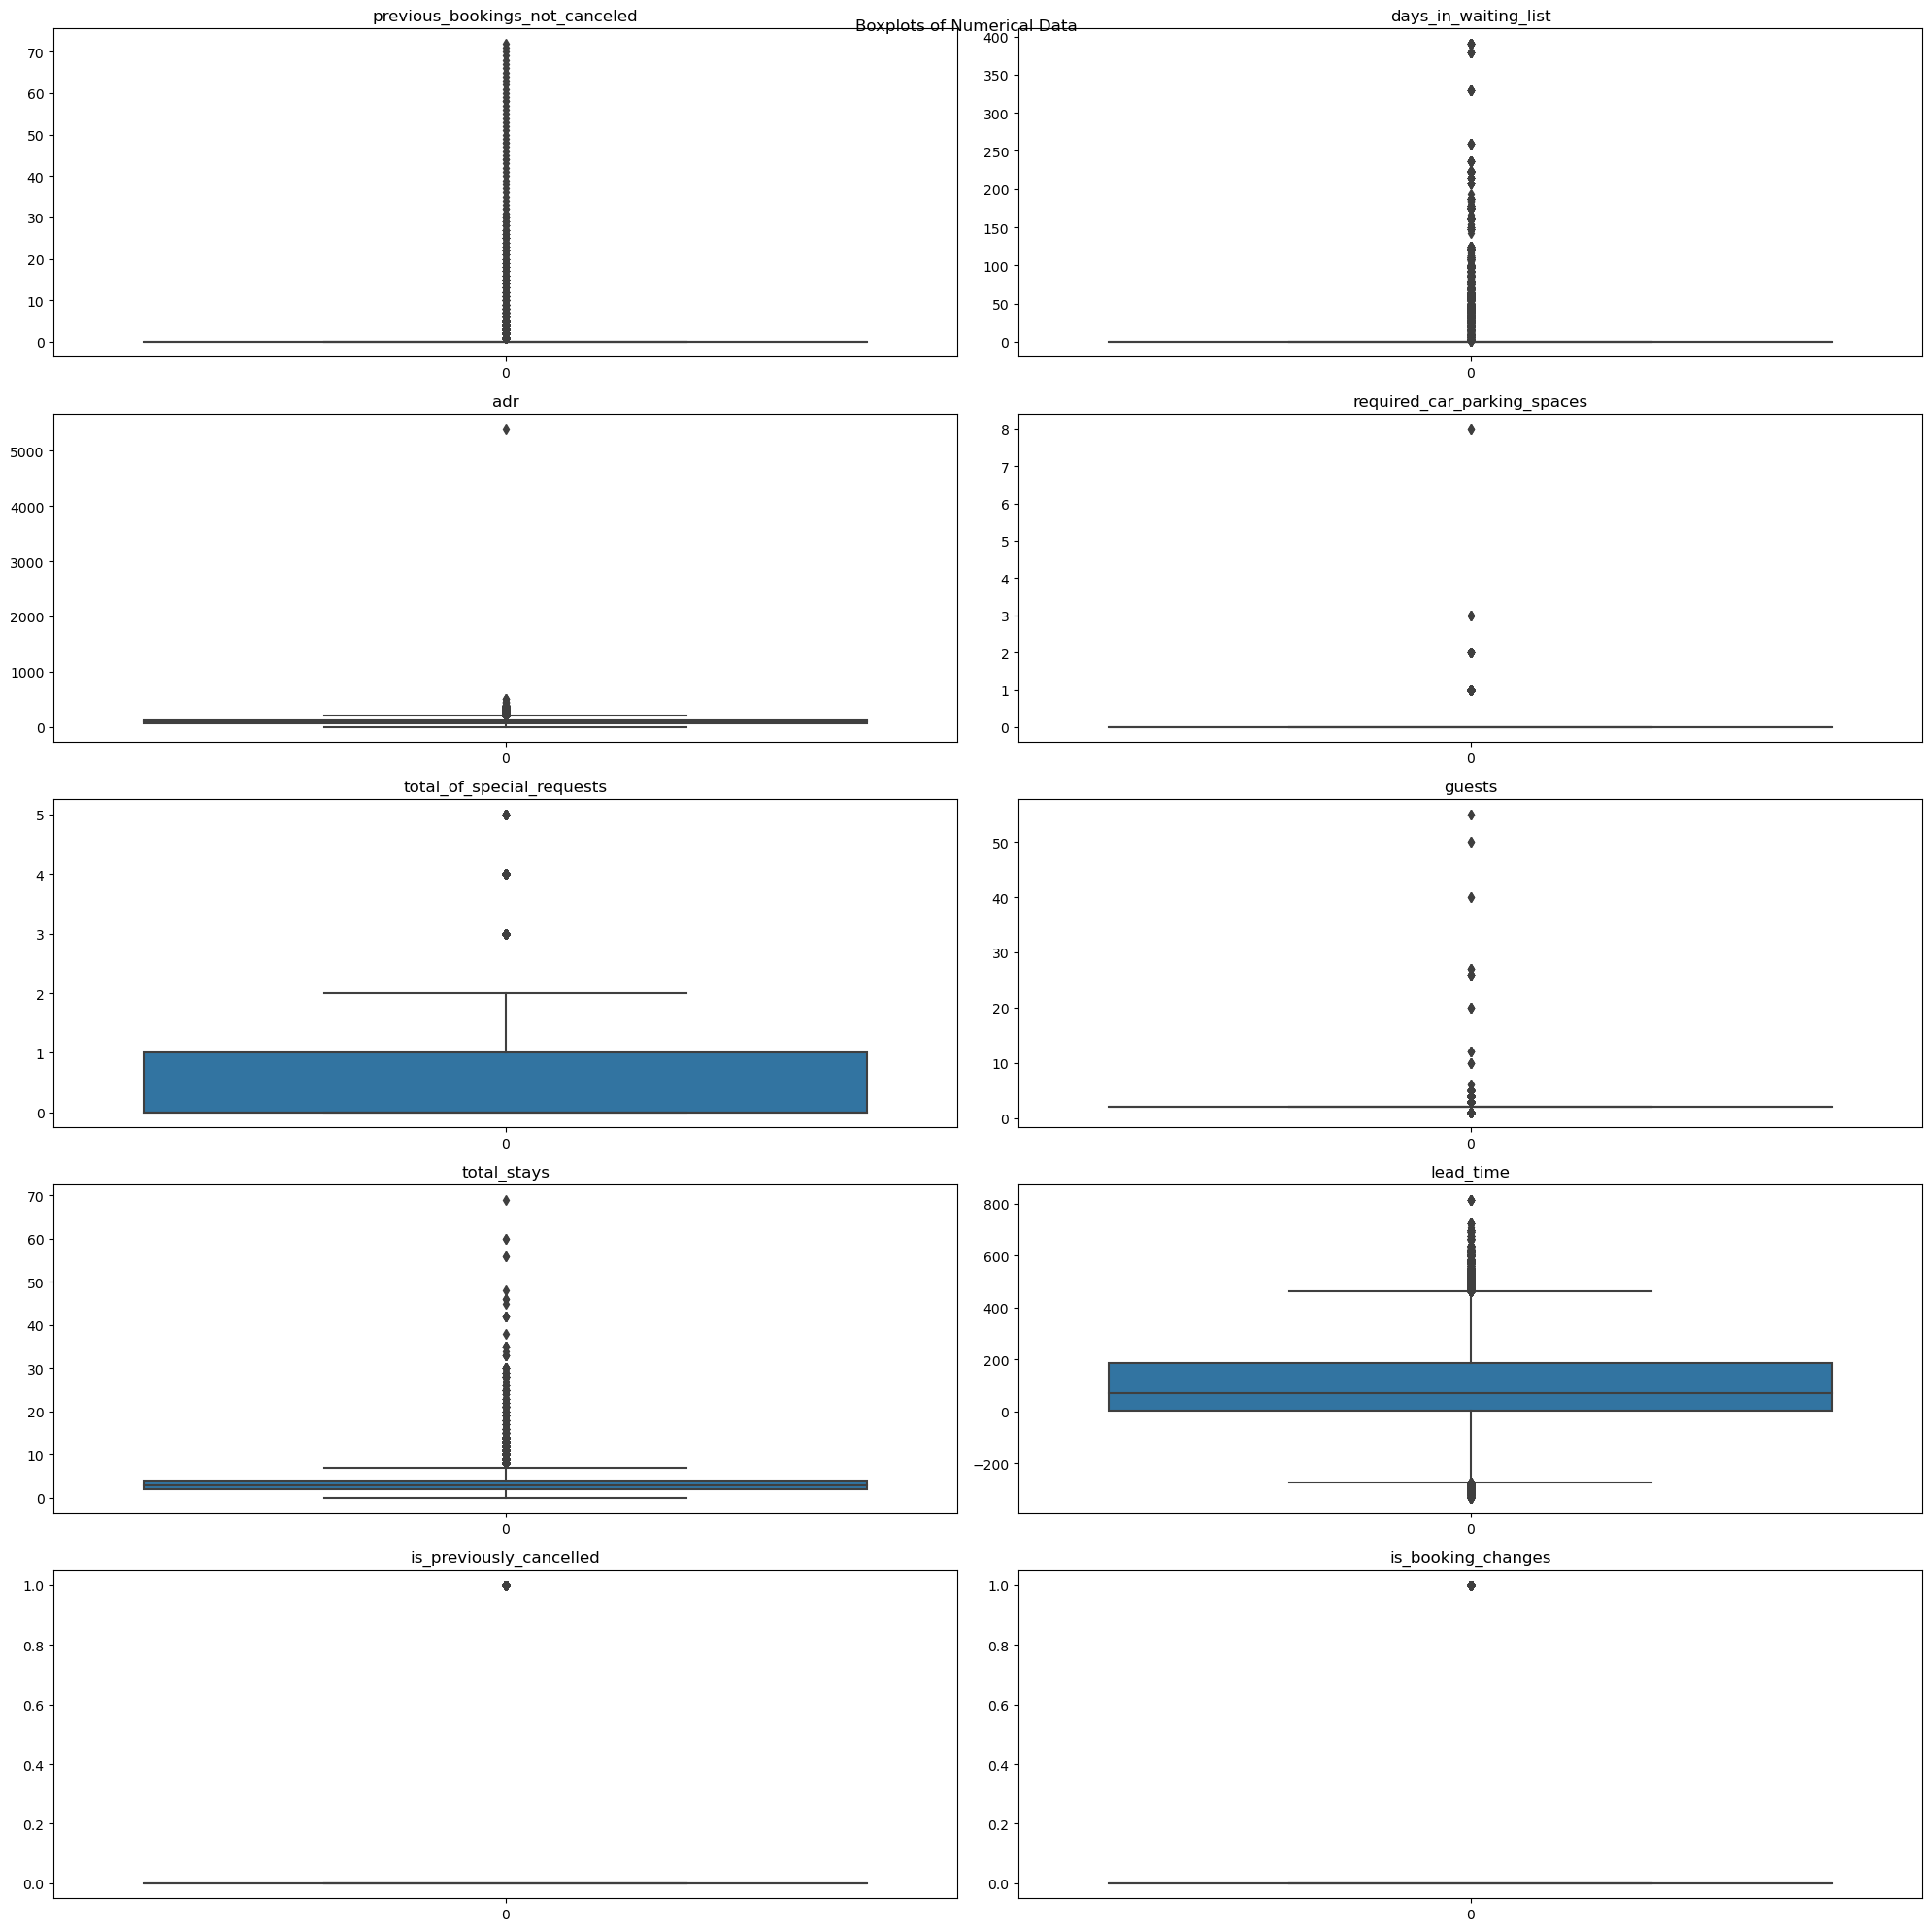

In [53]:
# Drop date columns from numerical columns
num= [e for e in num if e not in ('reservation_status_date')]


### since the there is no null value anymore in the data now i will check the outliers 

plt.figure(figsize = (20, 20))
x = 1 

for column in num[::]:
    plt.subplot(5,2,x)
    sns.boxplot(df[column]).set_title(column)
    x+=1
    
plt.tight_layout()
plt.suptitle('Boxplots of Numerical Data', va='bottom')
plt.show()

# we can see that there are huge outliers in many of the columns 
# we will handle the outliers by binning the columns that has outliers in it and from the box plot there are columns that has a random value like 0 number of adults 

In [54]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [55]:
lr,ur=remove_outlier(df[num])
df[num]=np.where(df[num]>ur,ur,df[num])
df[num]=np.where(df[num]<lr,lr,df[num])

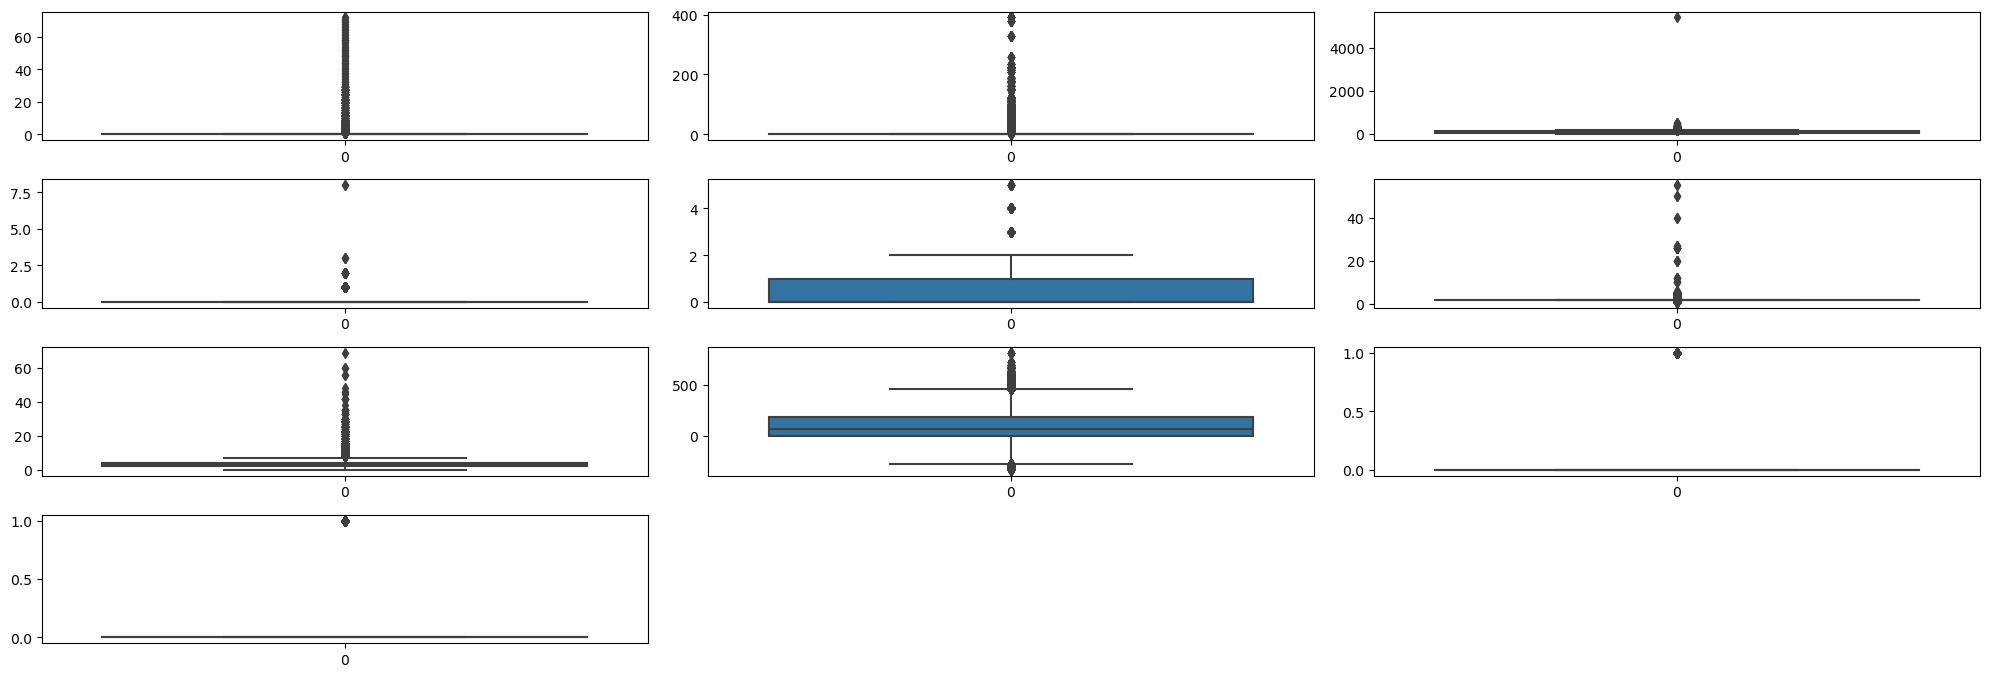

In [56]:
plt.figure(figsize = (20, 10))
x = 1 

for column in num[::]:
    plt.subplot(6,3,x)
    sns.boxplot(df[column])
    x+=1
    
plt.tight_layout()

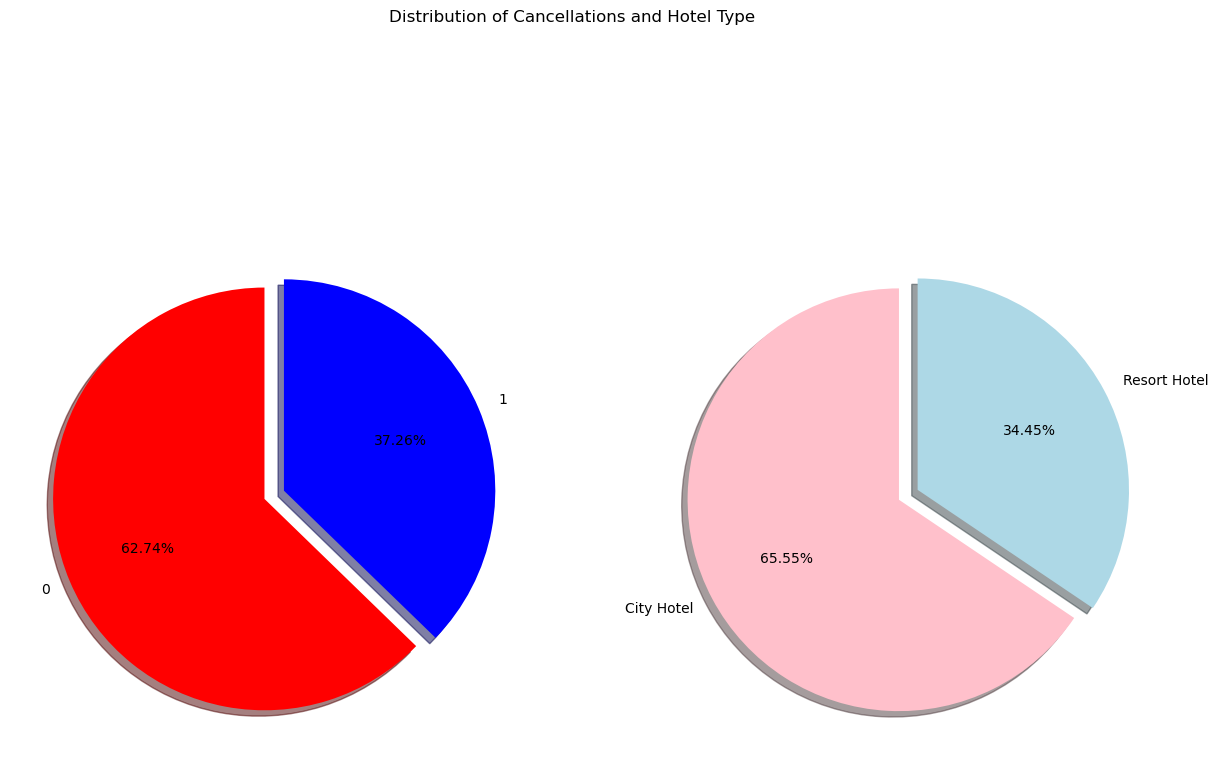

In [57]:
plt.rcParams['figure.figsize']=15,10
plt.subplot(121)
plt.pie(df['is_canceled'].value_counts().values,
        labels=df['is_canceled'].value_counts().index,
        startangle=90,
        colors=['red', 'blue'],
        explode=[0.05,0.05],
        shadow=True, autopct='%1.2f%%')
plt.subplot(122)
plt.pie(df['hotel'].value_counts().values,
        labels=df['hotel'].value_counts().index,
        startangle=90,
        colors=['pink', 'lightblue'],
        explode=[0.05,0.05],
        shadow=True, autopct='%1.2f%%')

plt.suptitle('Distribution of Cancellations and Hotel Type')

# plt.savefig('plots/categorical.png')
plt.show()

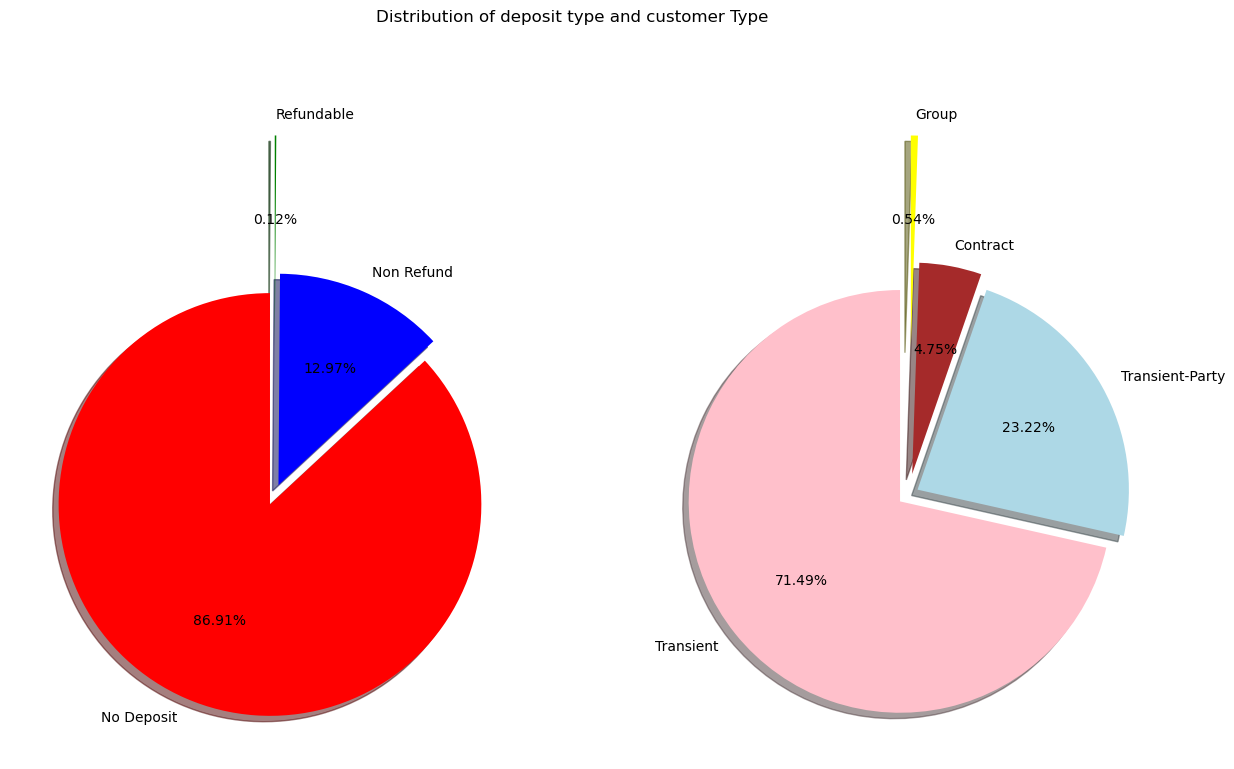

In [58]:
plt.rcParams['figure.figsize']=15,10
plt.subplot(121)
plt.pie(df['deposit_type'].value_counts().values,
        labels=df['deposit_type'].value_counts().index,
        startangle=90,
        colors=['red', 'blue', 'green'],
        explode=[0.05,0.05,0.7],
        shadow=True, autopct='%1.2f%%')
plt.subplot(122)
plt.pie(df['customer_type'].value_counts().values,
        labels=df['customer_type'].value_counts().index,
        startangle=90,
        colors=['pink', 'lightblue', 'brown', 'yellow'],
        explode=[0.05,0.05,0.1,0.7],
        shadow=True, autopct='%1.2f%%')

plt.suptitle('Distribution of deposit type and customer Type')

# plt.savefig('plots/categorical.png')
plt.show()

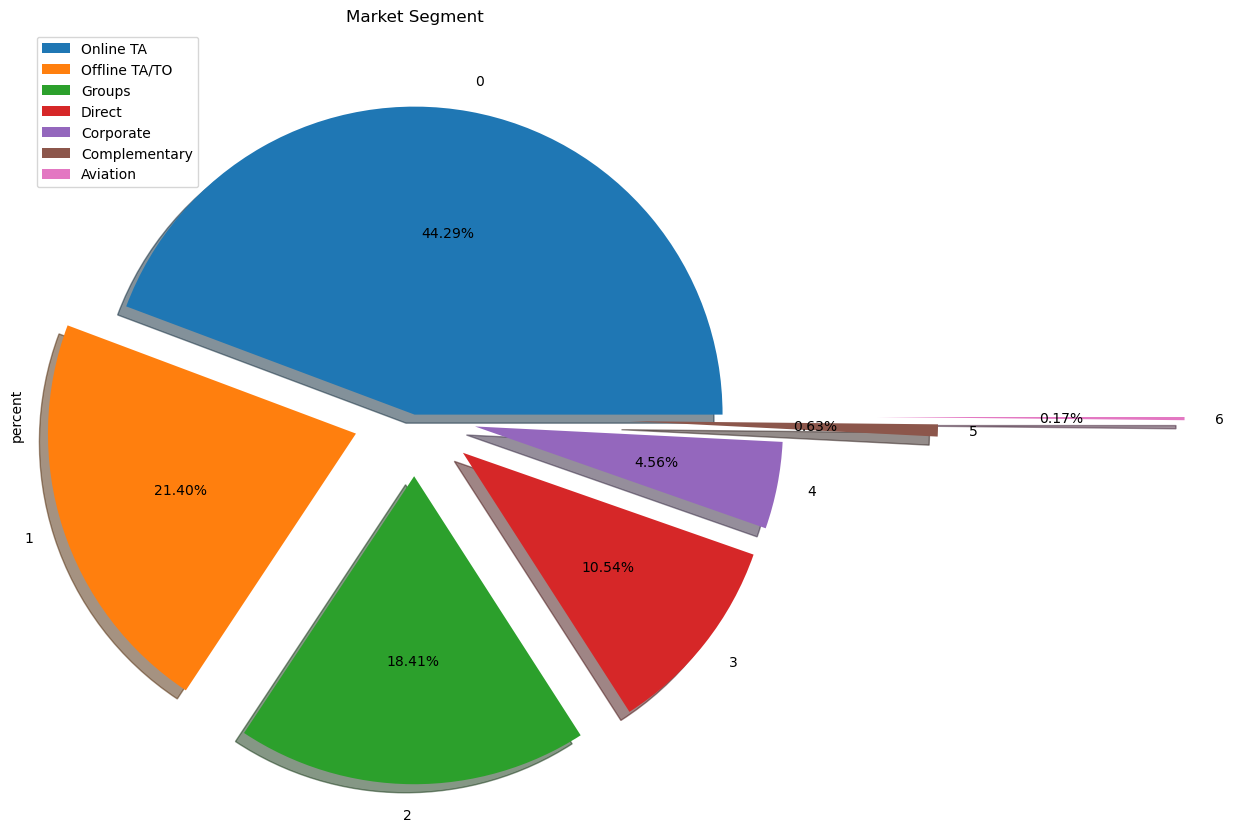

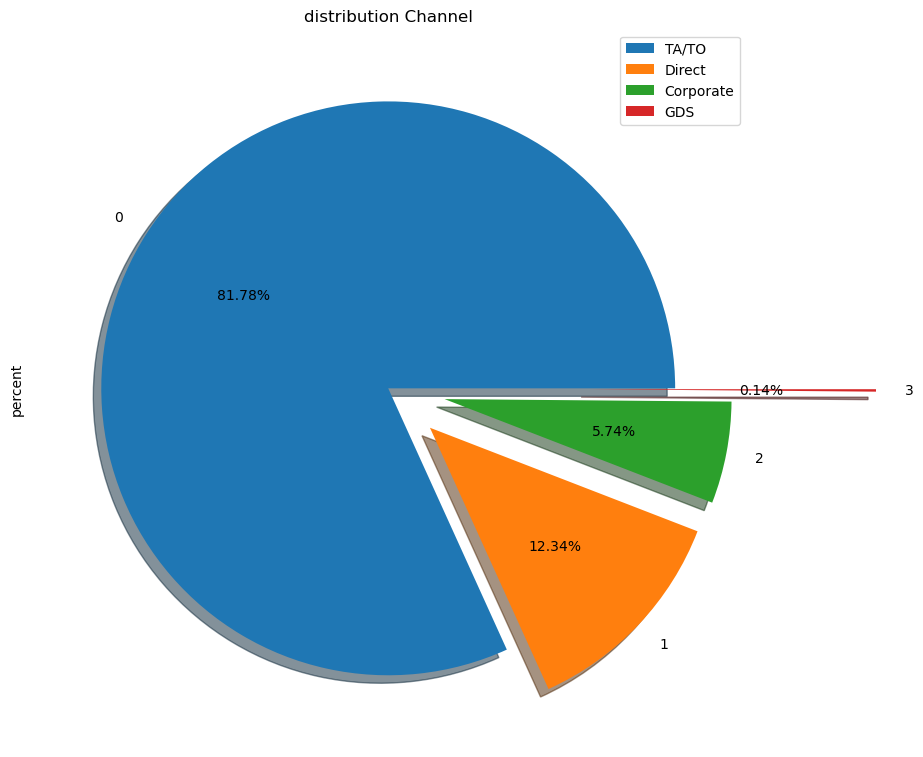

In [59]:
distribution_channel = df.stb.freq(['distribution_channel'], cum_cols = False)
market_segment = df.stb.freq(['market_segment'], cum_cols = False)
market_segment

plt.figure(figsize = (10, 10))

plt.subplot(1,1,1)
market_segment['percent'].plot.pie(explode = [0, 0.2, 0.2, 0.2, 0.2, 0.7, 1.5], 
                                               autopct = '%1.2f%%',
                                               shadow = True
                                               )
plt.legend(market_segment['market_segment'],loc='upper left')
plt.title('Market Segment')
plt.show()

plt.figure(figsize = (15, 15))
plt.subplot(2,1,1)
distribution_channel['percent'].plot.pie(explode = [0, 0.2, 0.2, 0.7], 
                                               autopct = '%1.2f%%',
                                               shadow = True
                                               )
plt.legend(distribution_channel['distribution_channel'])
plt.title('distribution Channel')

plt.tight_layout()
plt.show()


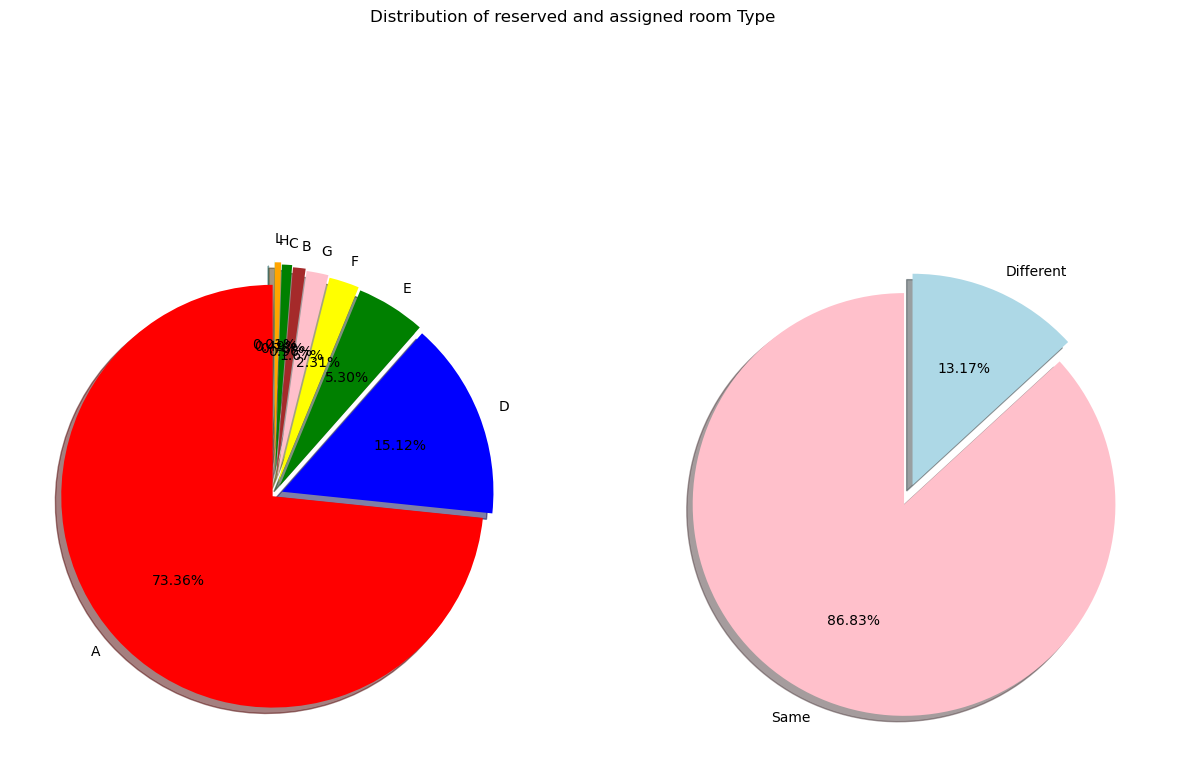

In [60]:
plt.rcParams['figure.figsize']=15,10
plt.subplot(121)
plt.pie(df['reserved_room_type'].value_counts().values,
        labels=df['reserved_room_type'].value_counts().index,
        startangle=90,
        colors=['red', 'blue', 'green', 'yellow', 'pink', 'brown', 'green', 'orange', 'cyan'],
        explode=[0.01,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11],
        shadow=True, autopct='%1.2f%%')
plt.subplot(122)
plt.pie(df['assigned_room_type'].value_counts().values,
        labels=df['assigned_room_type'].value_counts().index,
        startangle=90,
        colors=['pink', 'lightblue'],
        explode=[0.05,0.05],
        shadow=True, autopct='%1.2f%%')

plt.suptitle('Distribution of reserved and assigned room Type')

# plt.savefig('plots/categorical.png')
plt.show()

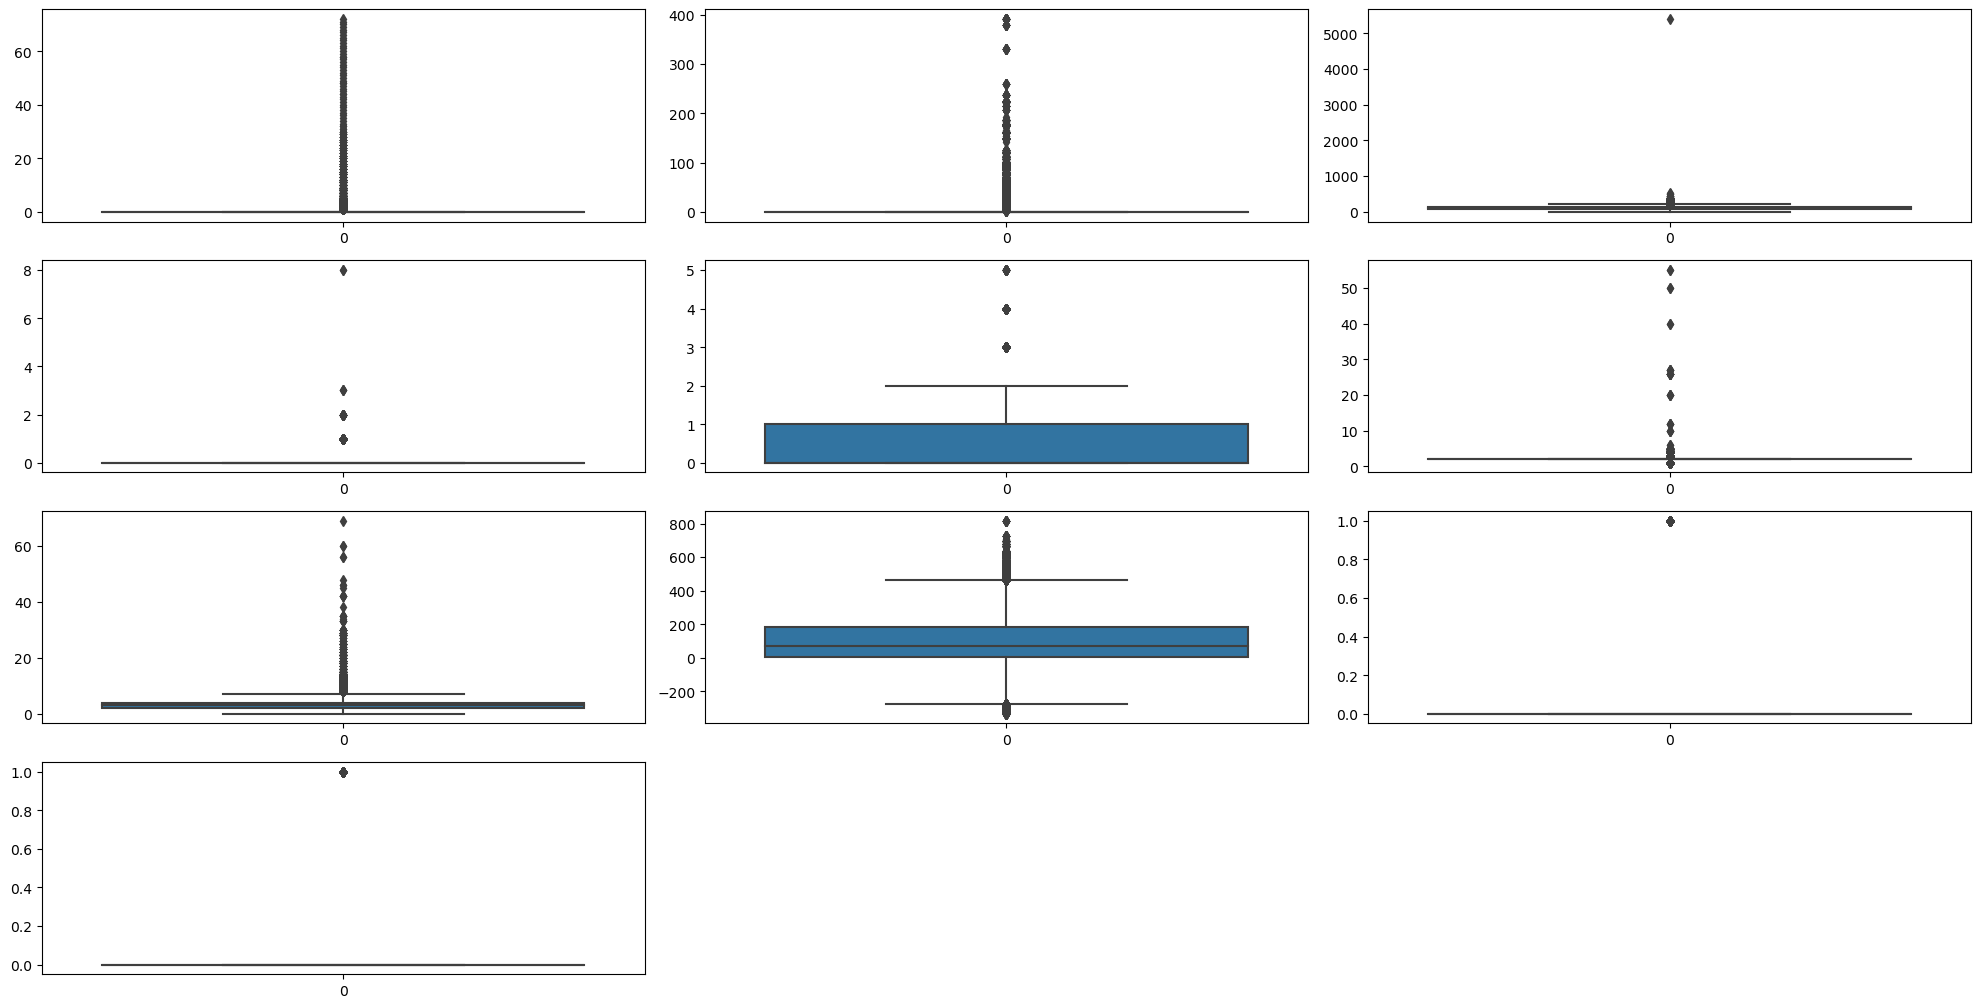

In [61]:
plt.figure(figsize = (20, 20))
x = 1 

for column in df.describe().columns:
    plt.subplot(8,3,x)
    sns.boxplot(df[column])
    x+=1
    
plt.tight_layout()

# as we can see that there are still many outliers in many of the columns 
# we are not going to drop or treat the outliers here as outliers could provide many useful information 
# we can bin in categories and create new column and hopefully we will be able to extract some more information by doing that 

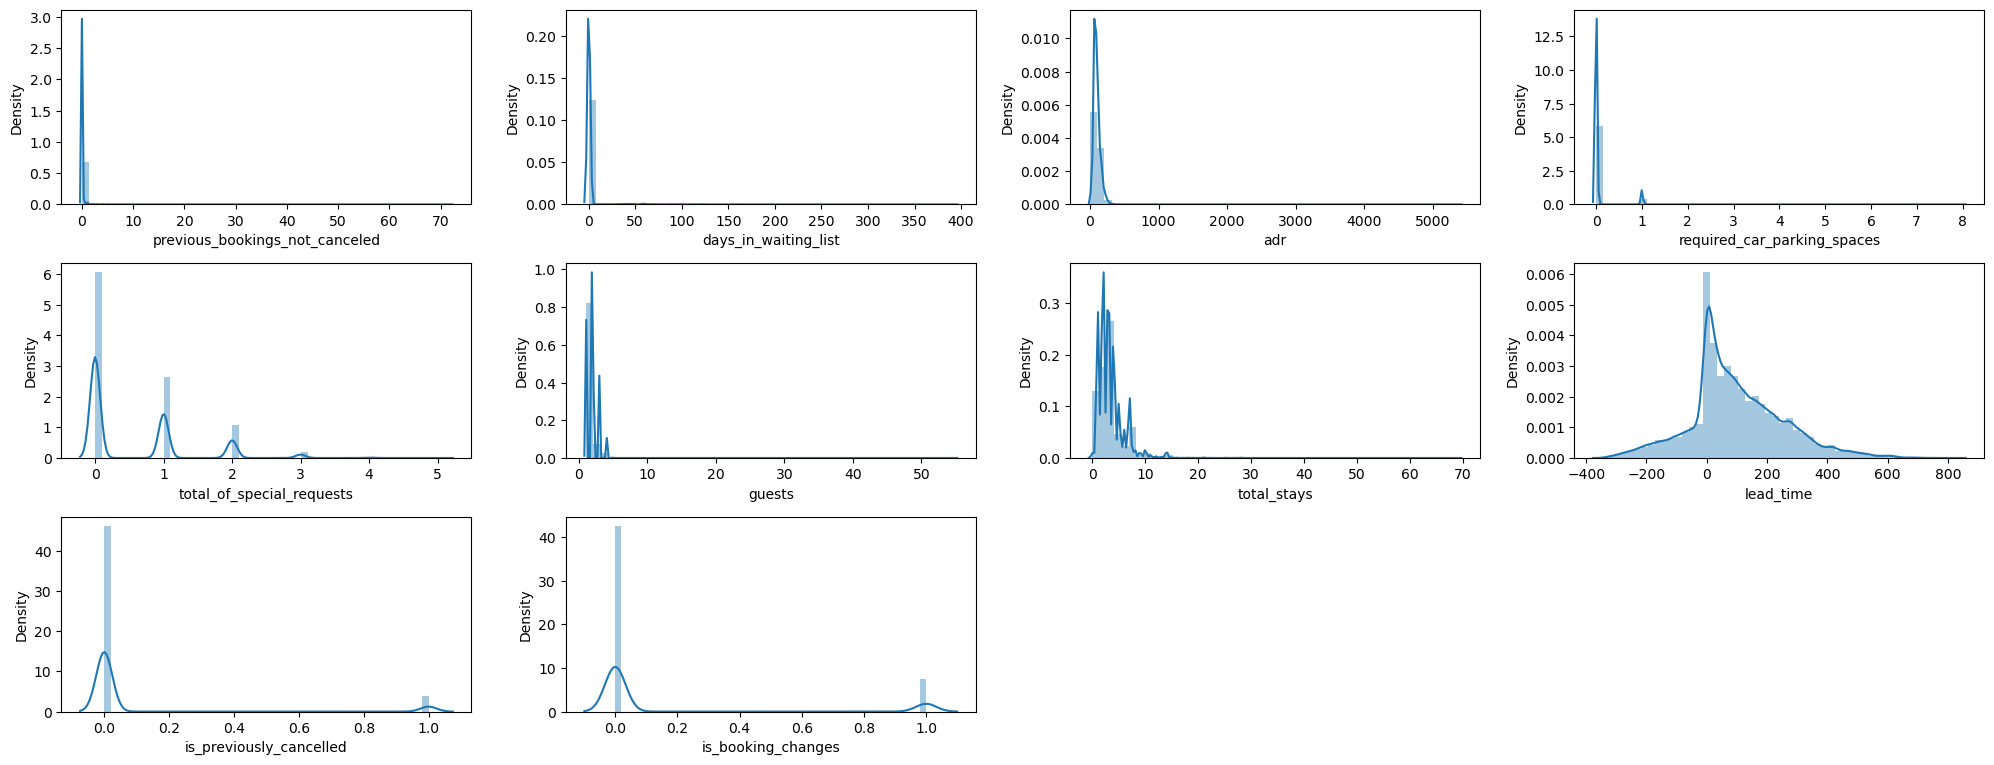

In [62]:
plt.figure(figsize = (20, 20))
x = 1 

for column in df.describe().columns:
    plt.subplot(8,4,x)
    sns.distplot(df[column])
    x+=1
    
plt.tight_layout()

In [63]:
print(num)

['previous_bookings_not_canceled', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'guests', 'total_stays', 'lead_time', 'is_previously_cancelled', 'is_booking_changes']


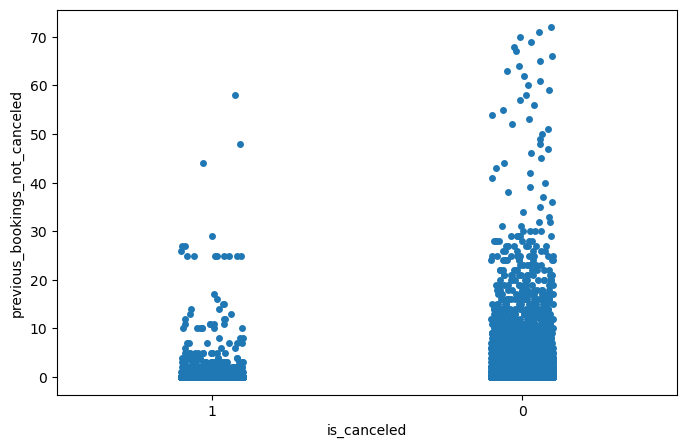

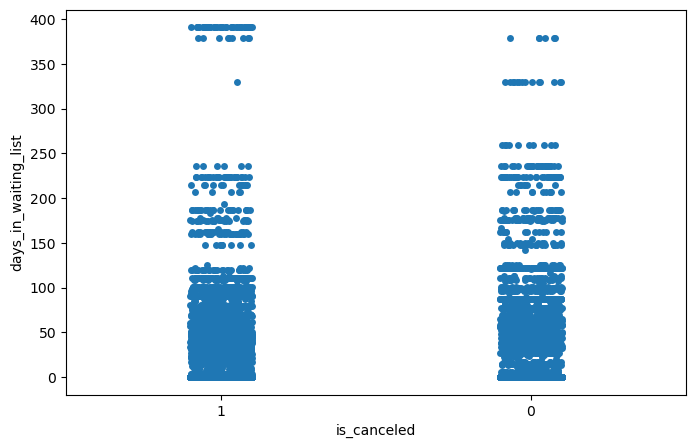

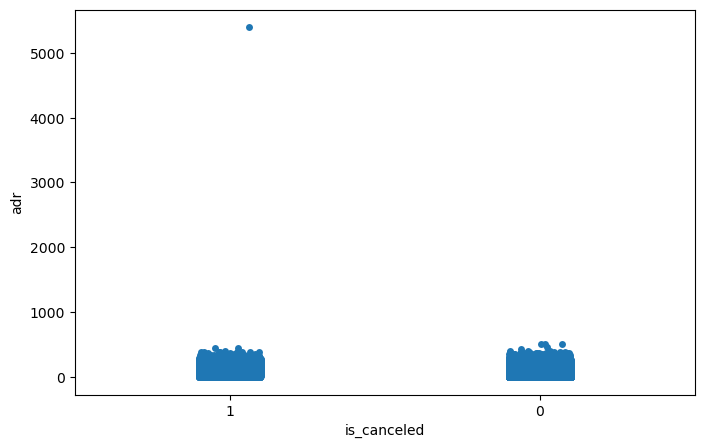

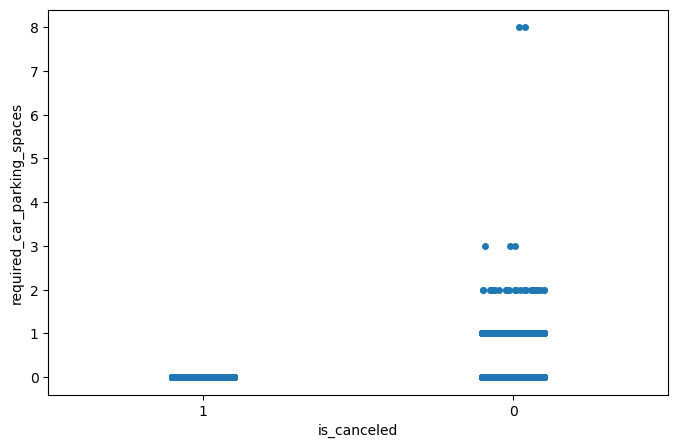

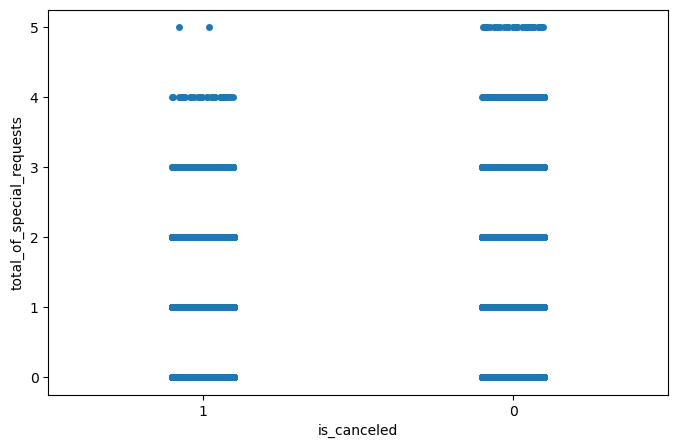

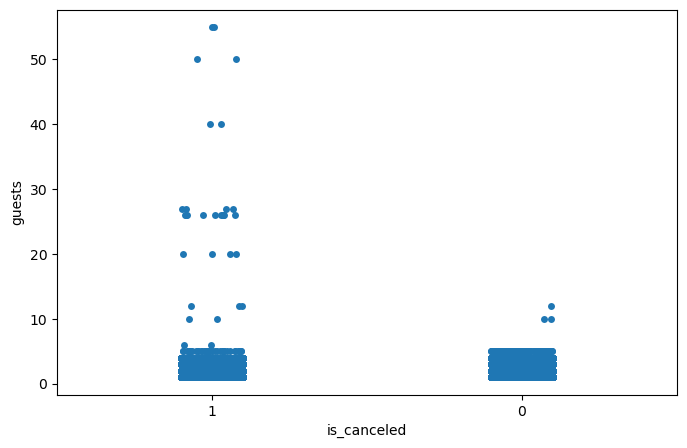

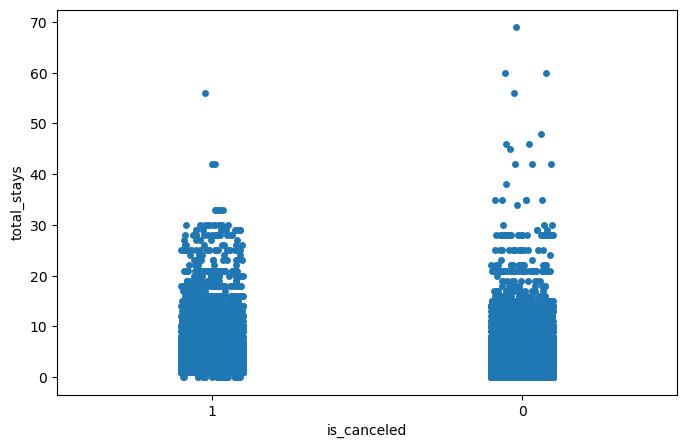

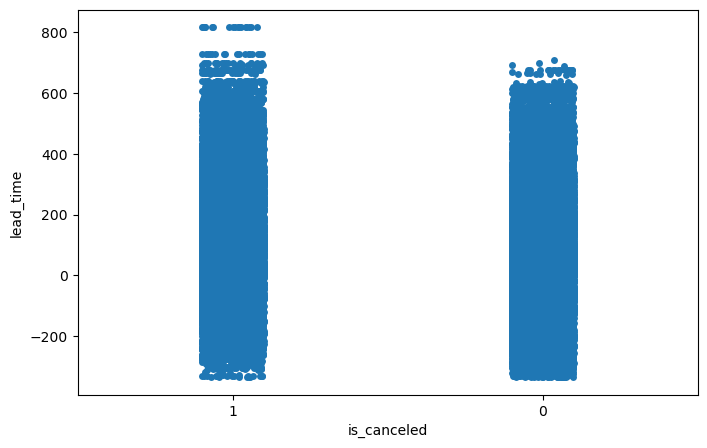

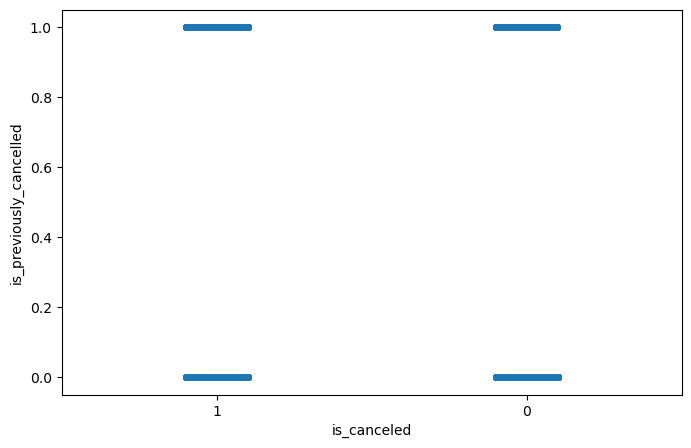

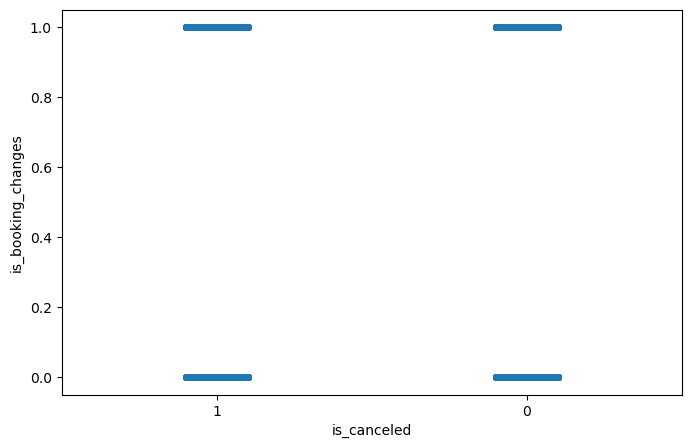

In [64]:
# plotting the canceled variable with other numerical variables
for x in num:
    plt.figure(figsize=(8,5))
    sns.stripplot(x=df["is_canceled"], y=df[x])
    plt.show()

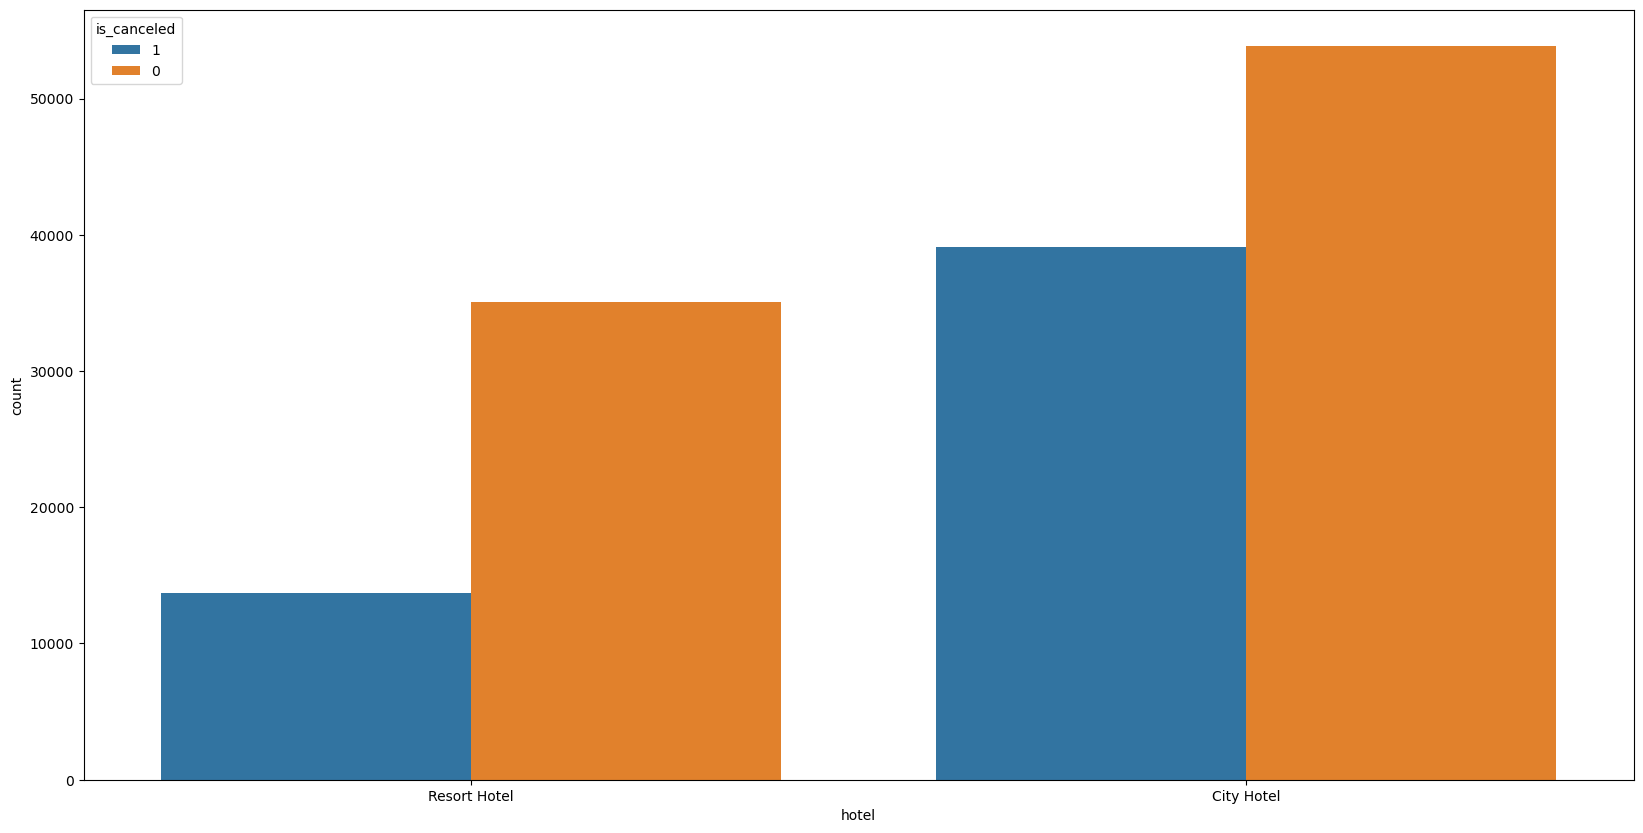

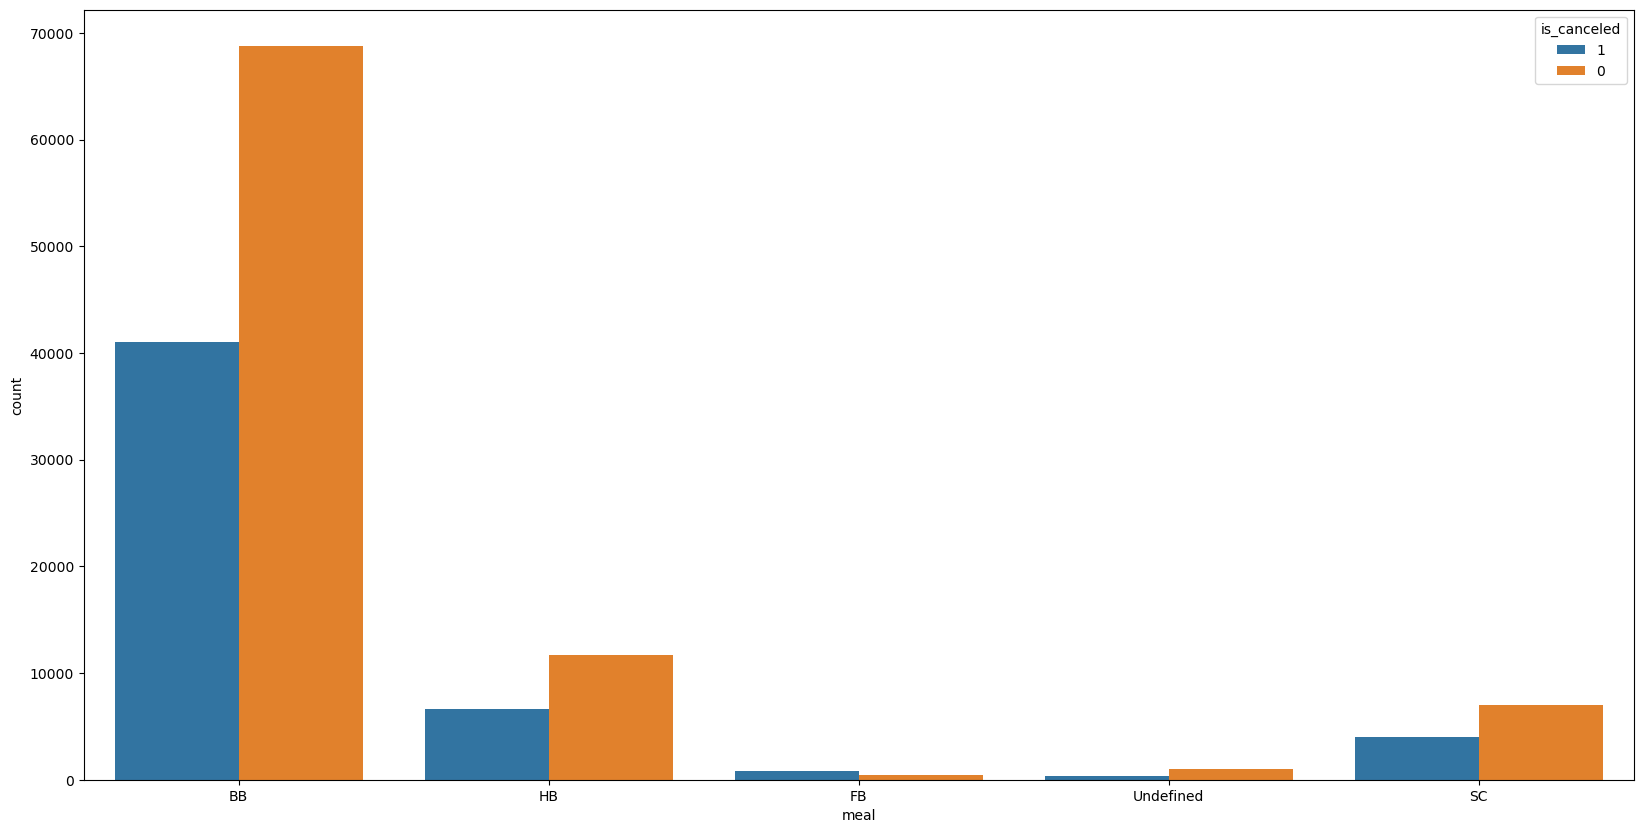

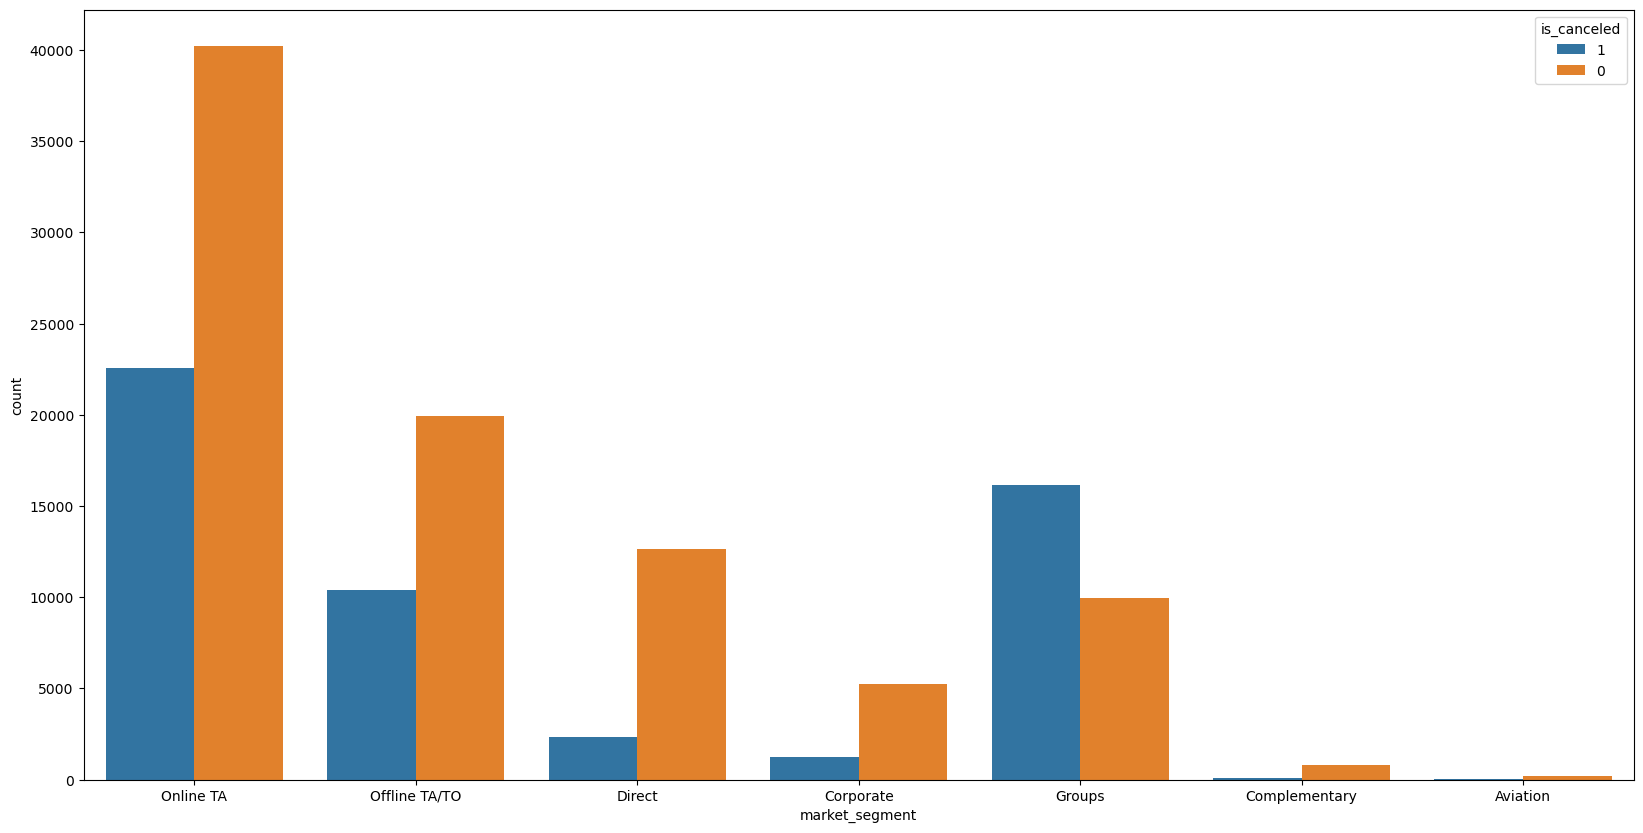

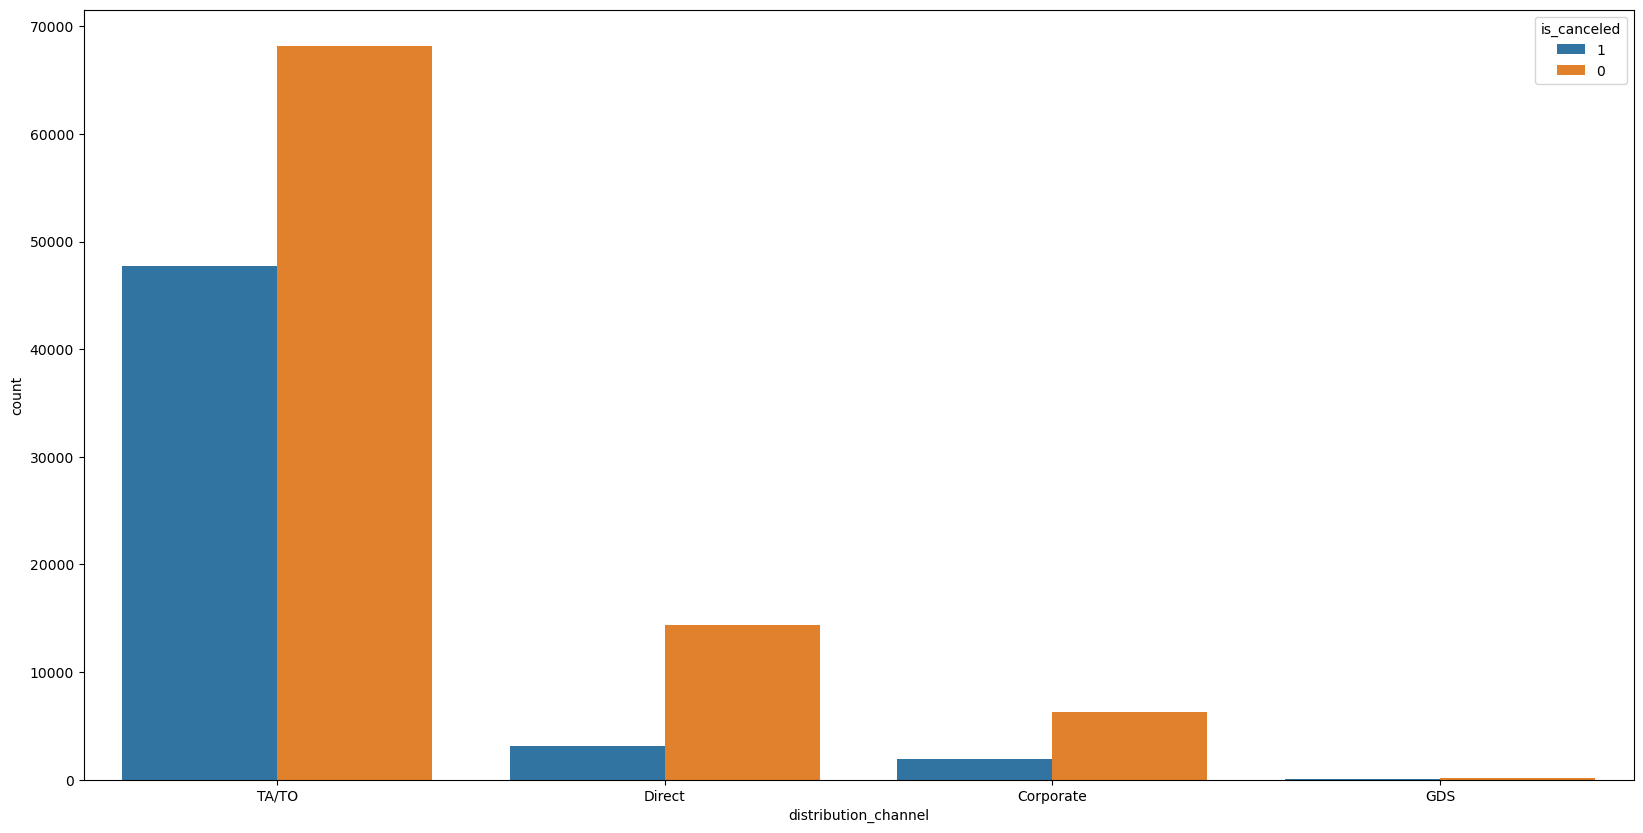

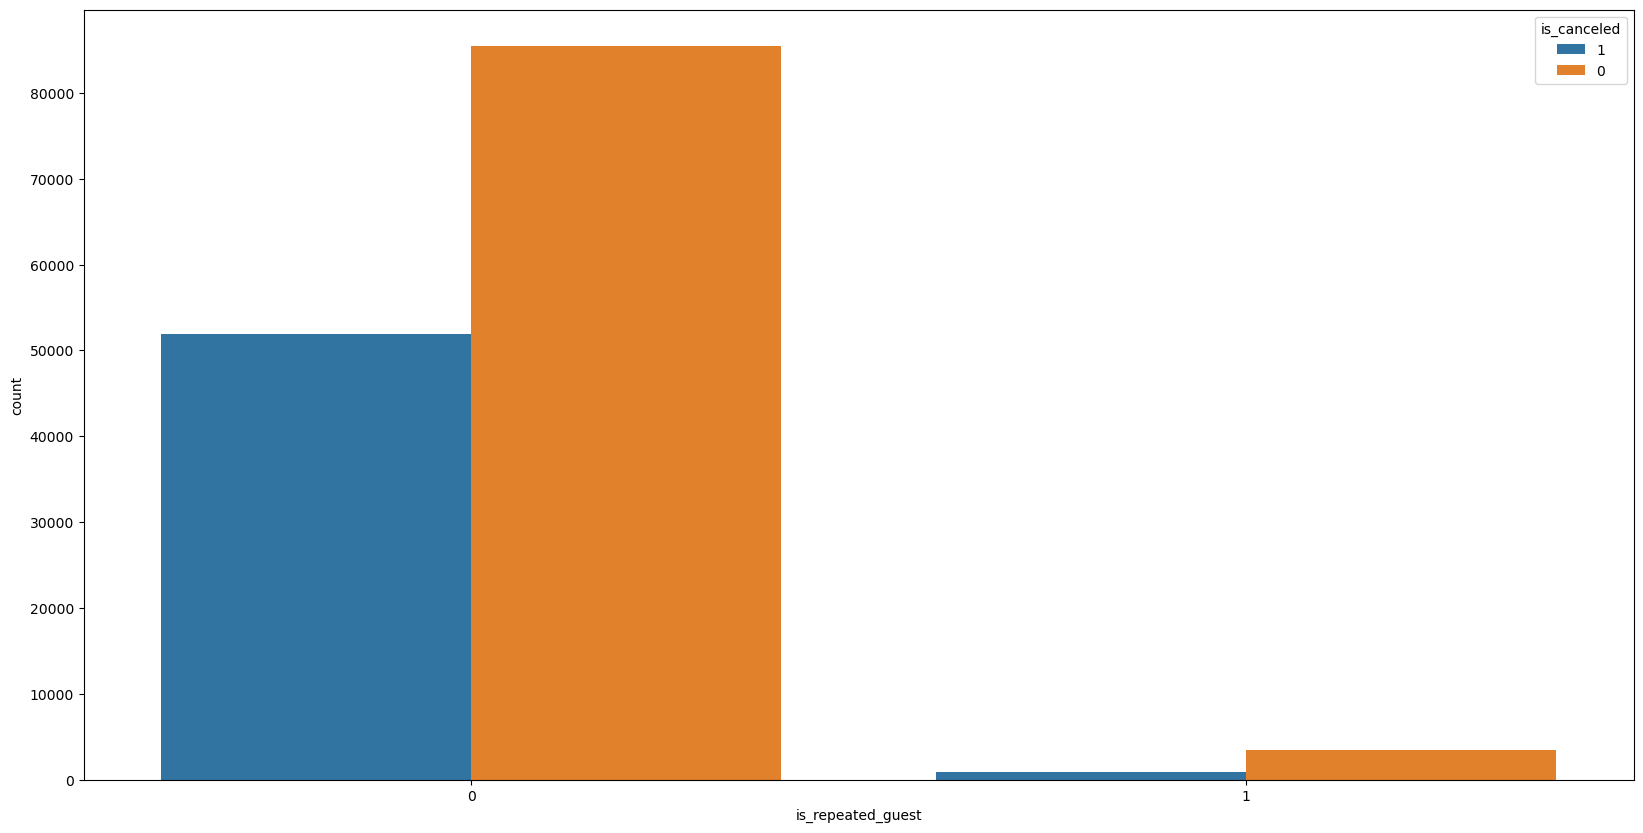

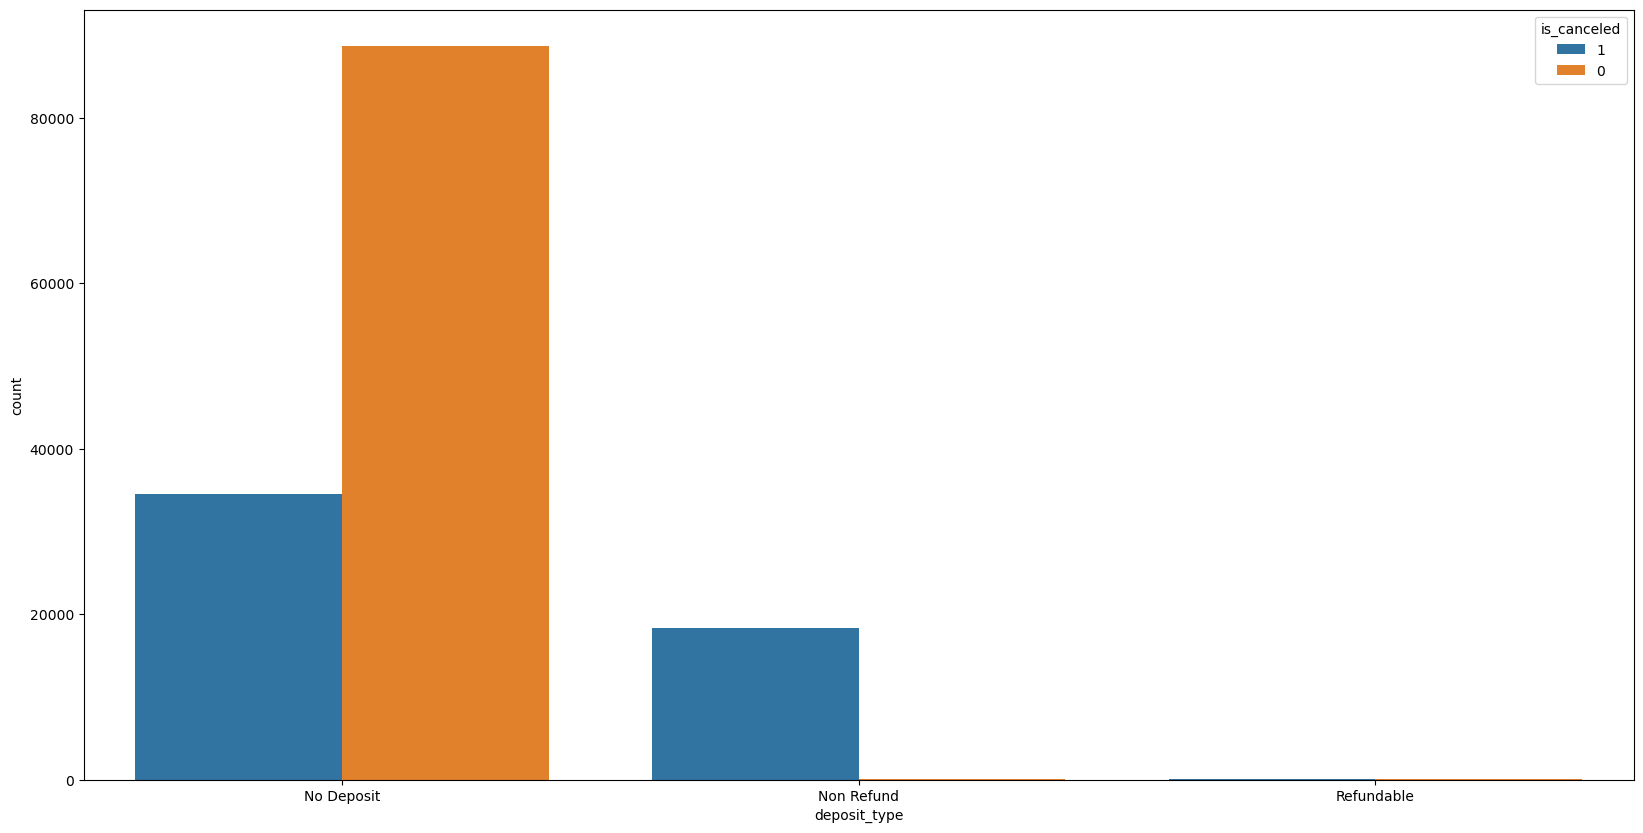

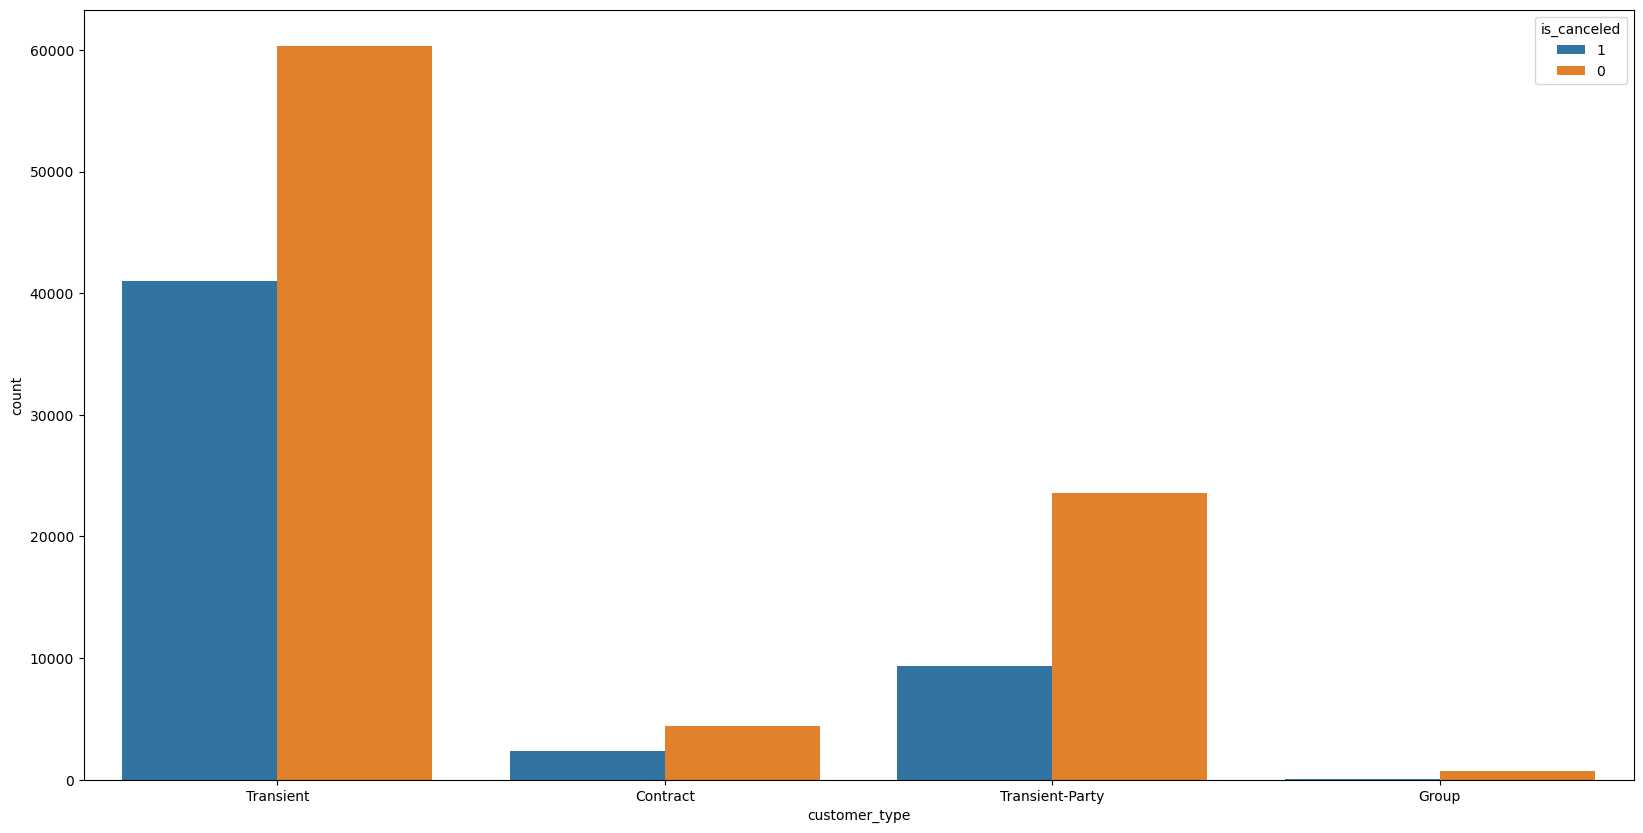

In [65]:
cat_1 = ['hotel', 'meal', 'market_segment',
         'distribution_channel', 'is_repeated_guest', 
         'deposit_type', 'customer_type']
# plotting the canceled variable with other categorical variables
for x in cat_1[::]:
    plt.figure(figsize=(20,10))
    sns.countplot(hue=df["is_canceled"], x=df[x])
    plt.show()

<Figure size 800x500 with 0 Axes>

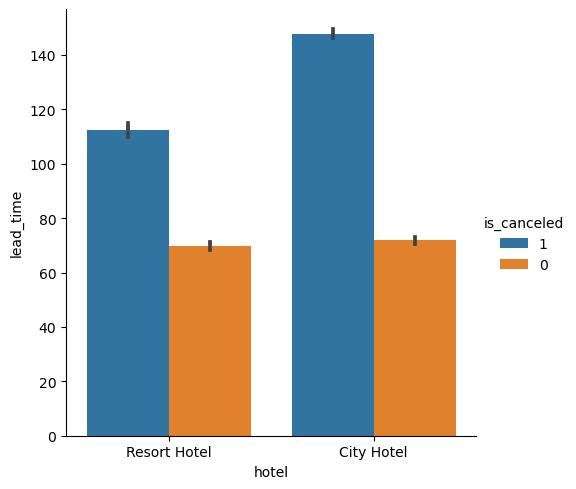

In [66]:
# plotting the canceled variable with lead time with respect to hotel type

plt.figure(figsize=(8,5))
sns.catplot(x="hotel", y="lead_time", hue="is_canceled", kind="bar", data = df)
plt.show();

In [67]:
# sns.pairplot(df,hue='is_canceled')

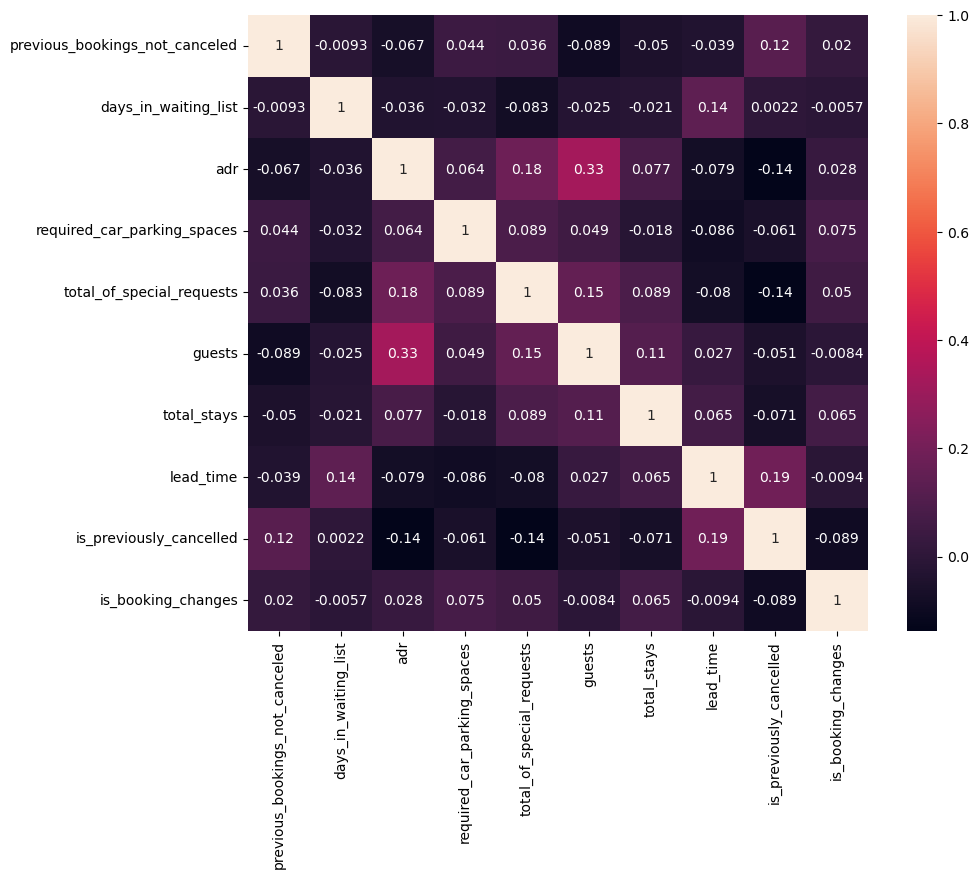

In [68]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [69]:
#since the data has been cleaned it has no more missing value and some randomness to the data we will export this data 
# Can do a tableau visualization from the data.

df.to_excel('hotel_cleaned.xlsx' ,index= False)

In [70]:
#No. of duplicate records after data cleaning
print('No. of duplicate rows in the data :',df.duplicated().sum())

No. of duplicate rows in the data : 41891


In [71]:
# after dropping duplicate rows
df.drop_duplicates(keep=False,inplace=True)
print('No. of duplicate rows in the data after dropping :',df.duplicated().sum())

No. of duplicate rows in the data after dropping : 0


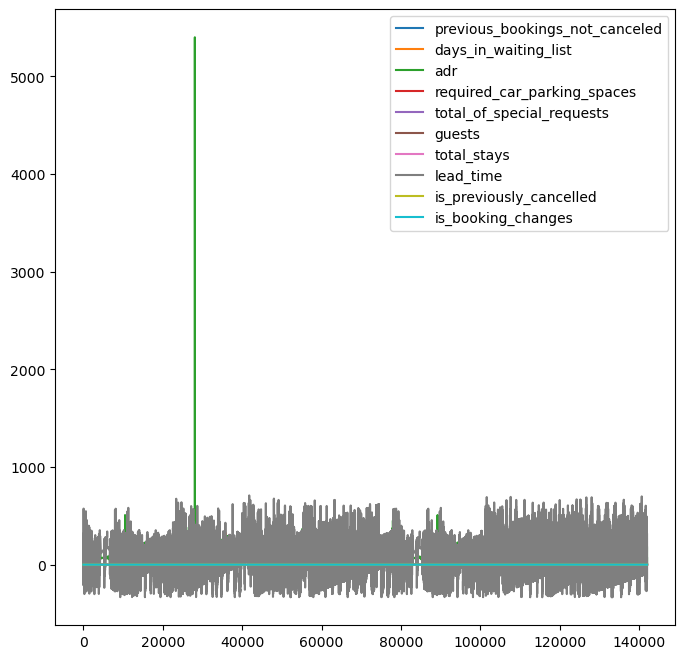

In [72]:
# prior to scaling
plt.figure(figsize=(8,8))
plt.plot(df[num])
plt.legend(df[num], loc='upper right')
plt.show()

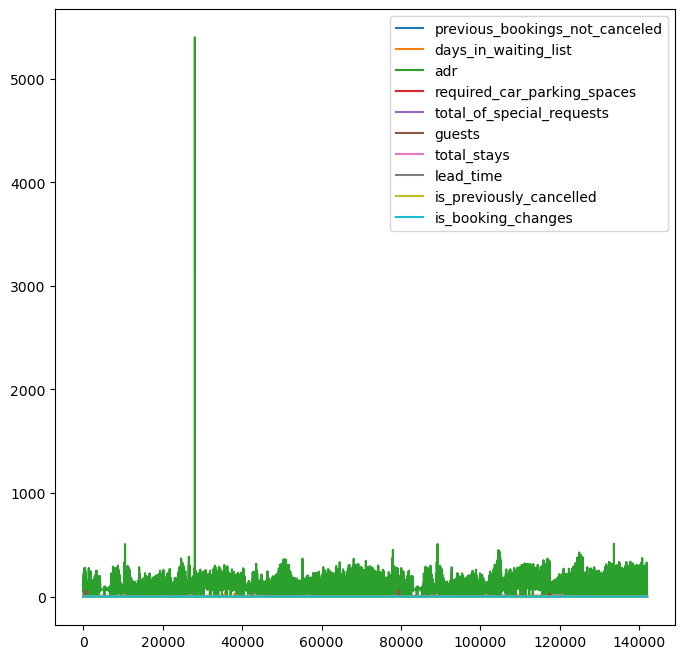

In [73]:

# Creating an object for the StandardScaler function
X = StandardScaler()

# fitting and transforming the numerical columns 
df['days_in_waiting_list'] = X.fit_transform(df[['days_in_waiting_list']])
df['required_car_parking_spaces'] = X.fit_transform(df[['required_car_parking_spaces']])
df['totalno_of_special_requests'] = X.fit_transform(df[['total_of_special_requests']])
df['guests'] = X.fit_transform(df[['guests']])
df['total_stays'] = X.fit_transform(df[['total_stays']])
df['lead_time'] = X.fit_transform(df[['lead_time']])

    

#after scaling plot visualization
plt.figure(figsize=(8,8))
plt.plot(df[num])
plt.legend(df[num])
plt.show()

In [74]:
# we will be dropping agent and company columns 
df = df.drop(columns = ['agent', 'company', 'previous_bookings_not_canceled', 'is_previously_cancelled', 'reservation_status'])
df.head()

,hotel,is_canceled,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,arrival_date,booking_date,guests,total_stays,lead_time,is_booking_changes,totalno_of_special_requests
0,Resort Hotel,1,BB,PRT,Online TA,TA/TO,0,A,Same,No Deposit,-0.062711,Transient,82.0,-0.32116,1.0,2018-05-06,01-07-2018,07-04-2018,-0.052563,-0.249498,-1.763908,0.0,0.342143
1,Resort Hotel,1,HB,PRT,Offline TA/TO,TA/TO,0,D,Same,No Deposit,-0.062711,Transient,105.5,-0.32116,0.0,2018-04-22,01-07-2018,17-04-2018,-0.052563,-0.249498,-1.190219,0.0,-0.855064
2,Resort Hotel,1,BB,PRT,Online TA,TA/TO,0,E,Same,No Deposit,-0.062711,Transient,123.0,-0.32116,0.0,2018-06-23,01-07-2018,08-06-2018,-0.052563,0.105808,-2.006623,0.0,-0.855064
3,Resort Hotel,1,BB,PRT,Online TA,TA/TO,0,E,Same,No Deposit,-0.062711,Transient,107.0,-0.32116,2.0,2018-05-11,01-07-2018,02-05-2018,-0.052563,1.171726,-0.668014,0.0,1.539350
4,Resort Hotel,1,BB,PRT,Direct,Direct,0,E,Same,No Deposit,-0.062711,Transient,108.3,-0.32116,2.0,2018-05-29,01-07-2018,27-03-2018,-0.052563,2.237643,-1.035764,0.0,1.539350


In [75]:
def changes(row):
    if (row['country'] == 'PRT'):
        return 'Domestic'
    else :
        return 'International'

df['country'] = df.apply(changes, axis = 1)
df.stb.freq(['country'], cum_cols = False)

,country,count,percent
0,International,59645,66.626081
1,Domestic,29877,33.373919


In [76]:
def changes(row):
    if (row['reserved_room_type'] == 'A'):
        return 'Standard'
    else :
        return 'Premium'

df['reserved_room_type'] = df.apply(changes, axis = 1)
df.stb.freq(['reserved_room_type'], cum_cols = False)

,reserved_room_type,count,percent
0,Standard,56767,63.411229
1,Premium,32755,36.588771


In [77]:
# creating dummy variables for ML model
model_df = pd.get_dummies(df, prefix=['hotel',
                             'meal',
                             'market_segment',
                             'distribution_channel',
                             'reserved_room_type',
                             'assigned_room_type',
                             'deposit_type',
                             'customer_type'], 
                    columns= ['hotel',
                             'meal',
                             'market_segment',
                             'distribution_channel',
                             'reserved_room_type',
                             'assigned_room_type',
                             'deposit_type',
                             'customer_type'],
                  drop_first = True)
model_df.head()

,is_canceled,country,is_repeated_guest,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,arrival_date,booking_date,guests,total_stays,lead_time,is_booking_changes,totalno_of_special_requests,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,reserved_room_type_Standard,assigned_room_type_Same,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,1,Domestic,0,-0.062711,82.0,-0.32116,1.0,2018-05-06,01-07-2018,07-04-2018,-0.052563,-0.249498,-1.763908,0.0,0.342143,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0
1,1,Domestic,0,-0.062711,105.5,-0.32116,0.0,2018-04-22,01-07-2018,17-04-2018,-0.052563,-0.249498,-1.190219,0.0,-0.855064,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,1,Domestic,0,-0.062711,123.0,-0.32116,0.0,2018-06-23,01-07-2018,08-06-2018,-0.052563,0.105808,-2.006623,0.0,-0.855064,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
3,1,Domestic,0,-0.062711,107.0,-0.32116,2.0,2018-05-11,01-07-2018,02-05-2018,-0.052563,1.171726,-0.668014,0.0,1.539350,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
4,1,Domestic,0,-0.062711,108.3,-0.32116,2.0,2018-05-29,01-07-2018,27-03-2018,-0.052563,2.237643,-1.035764,0.0,1.539350,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0


In [78]:

# model_df.to_excel('hotel_model_data.xlsx' ,index= False)

### Data Reloading

In [79]:
df = pd.read_excel('hotel_cleaned.xlsx')
df.head()

,hotel,is_canceled,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,booking_date,guests,total_stays,lead_time,is_previously_cancelled,is_booking_changes
0,Resort Hotel,1,BB,PRT,Online TA,TA/TO,0,0,A,Same,No Deposit,240.0,No_Company,0,Transient,82.0,0,1,Canceled,2018-05-06,01-07-2018,07-04-2018,2.0,3,-178,0,0
1,Resort Hotel,1,HB,PRT,Offline TA/TO,TA/TO,0,0,D,Same,No Deposit,15.0,No_Company,0,Transient,105.5,0,0,Canceled,2018-04-22,01-07-2018,17-04-2018,2.0,3,-100,0,0
2,Resort Hotel,1,BB,PRT,Online TA,TA/TO,0,0,E,Same,No Deposit,240.0,No_Company,0,Transient,123.0,0,0,Canceled,2018-06-23,01-07-2018,08-06-2018,2.0,4,-211,0,0
3,Resort Hotel,1,BB,PRT,Online TA,TA/TO,0,0,E,Same,No Deposit,240.0,No_Company,0,Transient,107.0,0,2,Canceled,2018-05-11,01-07-2018,02-05-2018,2.0,7,-29,0,0
4,Resort Hotel,1,BB,PRT,Direct,Direct,0,0,E,Same,No Deposit,No_Agent,No_Company,0,Transient,108.3,0,2,Canceled,2018-05-29,01-07-2018,27-03-2018,2.0,10,-79,0,0


### Data Information

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141737 entries, 0 to 141736
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           141737 non-null  object        
 1   is_canceled                     141737 non-null  int64         
 2   meal                            141737 non-null  object        
 3   country                         141737 non-null  object        
 4   market_segment                  141737 non-null  object        
 5   distribution_channel            141737 non-null  object        
 6   is_repeated_guest               141737 non-null  int64         
 7   previous_bookings_not_canceled  141737 non-null  int64         
 8   reserved_room_type              141737 non-null  object        
 9   assigned_room_type              141737 non-null  object        
 10  deposit_type                    141737 non-null  object 

In [81]:
df.isna().sum()

hotel                             0
is_canceled                       0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date           0
arrival_date                      0
booking_date                      0
guests                            8
total_stays                       0
lead_time                         0
is_previously_cancelled           0
is_booking_changes                0
dtype: int64

In [82]:
#No. of duplicate records after data cleaning
print('No. of duplicate rows in the data :',df.duplicated().sum())

No. of duplicate rows in the data : 41891


In [83]:
# after dropping duplicate rows
df.drop_duplicates(keep=False,inplace=True)
print('No. of duplicate rows in the data after dropping :',df.duplicated().sum())

No. of duplicate rows in the data after dropping : 0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89522 entries, 0 to 141736
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           89522 non-null  object        
 1   is_canceled                     89522 non-null  int64         
 2   meal                            89522 non-null  object        
 3   country                         89522 non-null  object        
 4   market_segment                  89522 non-null  object        
 5   distribution_channel            89522 non-null  object        
 6   is_repeated_guest               89522 non-null  int64         
 7   previous_bookings_not_canceled  89522 non-null  int64         
 8   reserved_room_type              89522 non-null  object        
 9   assigned_room_type              89522 non-null  object        
 10  deposit_type                    89522 non-null  object        
 11  a

In [85]:
# Numerical column description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,89522.0,0.252541,0.434472,0.00,0.0000,0.0,1.0,1.0
is_repeated_guest,89522.0,0.040068,0.196121,0.00,0.0000,0.0,0.0,1.0
previous_bookings_not_canceled,89522.0,0.185496,1.716765,0.00,0.0000,0.0,0.0,72.0
days_in_waiting_list,89522.0,0.443556,7.073069,0.00,0.0000,0.0,0.0,330.0
adr,89522.0,106.451754,55.479771,-6.38,71.6425,98.4,135.0,5400.0
required_car_parking_spaces,89522.0,0.095619,0.297731,0.00,0.0000,0.0,0.0,8.0
total_of_special_requests,89522.0,0.714216,0.835282,0.00,0.0000,1.0,1.0,5.0
guests,89514.0,2.045848,0.872241,1.00,2.0000,2.0,2.0,55.0
total_stays,89522.0,3.702207,2.814491,0.00,2.0000,3.0,5.0,69.0
lead_time,89522.0,61.824423,135.962700,-334.00,0.0000,39.0,137.0,709.0


In [86]:
# Categorical column description
df.describe(include='O').T

,count,unique,top,freq
hotel,89522,2,City Hotel,52167
meal,89522,5,BB,70499
country,89522,175,PRT,29877
market_segment,89522,7,Online TA,53237
distribution_channel,89522,4,TA/TO,69982
reserved_room_type,89522,9,A,56767
assigned_room_type,89522,2,Same,75343
deposit_type,89522,3,No Deposit,89152
agent,89522,320,9.0,28391
company,89522,334,No_Company,84209


In [87]:
#country column
df.stb.freq(['country'], cum_cols = False).head(10)

# since maximum share is from top 5 countries portugal, great britain, France, Spain and Germany, we will be grouping rest of the 170 countries into others.

,country,count,percent
0,PRT,29877,33.373919
1,GBR,10474,11.699917
2,FRA,8829,9.862380
3,ESP,7821,8.736400
4,DEU,5059,5.651125
5,IRL,3208,3.583477
6,ITA,2960,3.306450
7,BEL,2042,2.281004
8,BRA,1948,2.176001
9,NLD,1933,2.159246


In [88]:
#Categorising countries into six categories : 

def changes(row):
    if (row['country'] == 'PRT'):
        return 'Portugal'
    elif (row['country'] == 'GBR'):
        return 'Great_Britain'
    elif (row['country'] == 'FRA'):
        return 'France'
    elif (row['country'] == 'ESP'):
        return 'Spain'
    elif (row['country'] == 'DEU'):
        return 'Germany'
    else :
        return 'Others'

df['country'] = df.apply(changes, axis = 1)
df.stb.freq(['country'], cum_cols = False)

,country,count,percent
0,Portugal,29877,33.373919
1,Others,27462,30.676258
2,Great_Britain,10474,11.699917
3,France,8829,9.862380
4,Spain,7821,8.736400
5,Germany,5059,5.651125


In [89]:
df.stb.freq(['reserved_room_type'], cum_cols = False)

# as from our df.describe(include = 'O') we saw that room A is the most popular room in the bookings 
# we will figure out later why, our assumption for now is room A is the cheapest room in the booking 
# compared to any other rooms

,reserved_room_type,count,percent
0,A,56767,63.411229
1,D,18100,20.218494
2,E,6545,7.311052
3,F,3090,3.451666
4,G,2266,2.531221
5,C,1064,1.188535
6,B,1014,1.132682
7,H,664,0.741717
8,L,12,0.013405


In [90]:
def changes(row):
    if (row['reserved_room_type'] == 'A'):
        return 'Standard'
    else :
        return 'Premium'

df['reserved_room_type'] = df.apply(changes, axis = 1)
df.stb.freq(['reserved_room_type'], cum_cols = False)

,reserved_room_type,count,percent
0,Standard,56767,63.411229
1,Premium,32755,36.588771


In [91]:
# creating dummy variables for ML model
model_df = pd.get_dummies(df, prefix=['hotel',
                             'meal',
                             'market_segment',
                             'distribution_channel',
                             'reserved_room_type',
                             'assigned_room_type',
                             'deposit_type',
                             'customer_type',
                             'country'], 
                    columns= ['hotel',
                             'meal',
                             'market_segment',
                             'distribution_channel',
                             'reserved_room_type',
                             'assigned_room_type',
                             'deposit_type',
                             'customer_type',
                             'country'],
                  drop_first = True)
model_df.head()

,is_canceled,is_repeated_guest,previous_bookings_not_canceled,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,booking_date,guests,total_stays,lead_time,is_previously_cancelled,is_booking_changes,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,reserved_room_type_Standard,assigned_room_type_Same,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,country_Germany,country_Great_Britain,country_Others,country_Portugal,country_Spain
0,1,0,0,240.0,No_Company,0,82.0,0,1,Canceled,2018-05-06,01-07-2018,07-04-2018,2.0,3,-178,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0
1,1,0,0,15.0,No_Company,0,105.5,0,0,Canceled,2018-04-22,01-07-2018,17-04-2018,2.0,3,-100,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0
2,1,0,0,240.0,No_Company,0,123.0,0,0,Canceled,2018-06-23,01-07-2018,08-06-2018,2.0,4,-211,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0
3,1,0,0,240.0,No_Company,0,107.0,0,2,Canceled,2018-05-11,01-07-2018,02-05-2018,2.0,7,-29,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0
4,1,0,0,No_Agent,No_Company,0,108.3,0,2,Canceled,2018-05-29,01-07-2018,27-03-2018,2.0,10,-79,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0


In [92]:
model_df = model_df.drop(['booking_date','arrival_date','agent','company',
                          'previous_bookings_not_canceled', 'is_previously_cancelled', 
                          'reservation_status', 'reservation_status_date'], axis=1)

In [93]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89522 entries, 0 to 141736
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   is_canceled                    89522 non-null  int64  
 1   is_repeated_guest              89522 non-null  int64  
 2   days_in_waiting_list           89522 non-null  int64  
 3   adr                            89522 non-null  float64
 4   required_car_parking_spaces    89522 non-null  int64  
 5   total_of_special_requests      89522 non-null  int64  
 6   guests                         89514 non-null  float64
 7   total_stays                    89522 non-null  int64  
 8   lead_time                      89522 non-null  int64  
 9   is_booking_changes             89522 non-null  int64  
 10  hotel_Resort Hotel             89522 non-null  uint8  
 11  meal_FB                        89522 non-null  uint8  
 12  meal_HB                        89522 non-null

In [94]:
model_df['adr'].where(model_df['adr'] >= 1, 1, inplace=True)

model_df['adr'].fillna(0).astype(np.int64, errors='ignore')


model_df['adr'].describe()

count    89522.000000
mean       106.473543
std         55.438134
min          1.000000
25%         71.642500
50%         98.400000
75%        135.000000
max       5400.000000
Name: adr, dtype: float64

In [95]:
model_df['guests'].where(model_df['guests'] >= 1, 1, inplace=True)

model_df['guests'].dropna().astype(np.int64, errors='ignore')


model_df['adr'].describe()

count    89522.000000
mean       106.473543
std         55.438134
min          1.000000
25%         71.642500
50%         98.400000
75%        135.000000
max       5400.000000
Name: adr, dtype: float64

In [96]:
model_df.dropna(subset=['guests'])
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89522 entries, 0 to 141736
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   is_canceled                    89522 non-null  int64  
 1   is_repeated_guest              89522 non-null  int64  
 2   days_in_waiting_list           89522 non-null  int64  
 3   adr                            89522 non-null  float64
 4   required_car_parking_spaces    89522 non-null  int64  
 5   total_of_special_requests      89522 non-null  int64  
 6   guests                         89522 non-null  float64
 7   total_stays                    89522 non-null  int64  
 8   lead_time                      89522 non-null  int64  
 9   is_booking_changes             89522 non-null  int64  
 10  hotel_Resort Hotel             89522 non-null  uint8  
 11  meal_FB                        89522 non-null  uint8  
 12  meal_HB                        89522 non-null

In [97]:
# Copy all the predictor variables into X dataframe
X = model_df.drop('is_canceled', axis=1)

# Copy target into the y dataframe. 
y = model_df[['is_canceled']]

In [98]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1, stratify = model_df['is_canceled'])

In [99]:
print (y_train.value_counts(normalize = True).round(4))
print (y_test.value_counts(normalize = True).round(4))

is_canceled
0              0.7475
1              0.2525
dtype: float64
is_canceled
0              0.7474
1              0.2526
dtype: float64


### Model 1: Logistic regression

In [100]:
X_train.head()


,is_repeated_guest,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,guests,total_stays,lead_time,is_booking_changes,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,reserved_room_type_Standard,assigned_room_type_Same,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,country_Germany,country_Great_Britain,country_Others,country_Portugal,country_Spain
102455,0,0,54.00,0,2,2.0,4,245,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0
9667,0,0,47.00,0,2,2.0,7,62,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,1,0,0,0,0
79863,0,0,40.29,0,1,2.0,13,216,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0
119951,0,0,66.00,0,0,2.0,14,154,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
101600,0,0,68.00,0,2,2.0,1,-219,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1


In [101]:
# invoke the LogisticRegression function and find the bestfit model on training data
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
LR_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [102]:
## Performance Matrix on train data set
ytrain_predict = LR_model.predict(X_train)
model_score = LR_model.score(X_train, y_train)
print('\n \033[1m Train Accuracy Score : \033[0m', model_score)
print('\n \033[1m Train Confusion Matrix :  \033[0m \n', metrics.confusion_matrix(y_train, ytrain_predict))
print('\n \033[1m Train Classification Report : \033[0m \n', metrics.classification_report(y_train, ytrain_predict))


  Train Accuracy Score :  0.7785685789515678

  Train Confusion Matrix :   
 [[43231  3609]
 [10267  5558]]

  Train Classification Report :  
               precision    recall  f1-score   support

           0       0.81      0.92      0.86     46840
           1       0.61      0.35      0.44     15825

    accuracy                           0.78     62665
   macro avg       0.71      0.64      0.65     62665
weighted avg       0.76      0.78      0.76     62665



In [103]:
## Performance Matrix on test data set
ytest_predict = LR_model.predict(X_test)
test_model_score = LR_model.score(X_test, y_test)
print('\n \033[1m Test Accuracy Score : \033[0m', test_model_score)
print('\n \033[1m Test Confusion Matrix :  \033[0m \n', metrics.confusion_matrix(y_test, ytest_predict))
print('\n \033[1m Test Classification Report : \033[0m \n', metrics.classification_report(y_test, ytest_predict))


  Test Accuracy Score :  0.777934989015899

  Test Confusion Matrix :   
 [[18538  1536]
 [ 4428  2355]]

  Test Classification Report :  
               precision    recall  f1-score   support

           0       0.81      0.92      0.86     20074
           1       0.61      0.35      0.44      6783

    accuracy                           0.78     26857
   macro avg       0.71      0.64      0.65     26857
weighted avg       0.76      0.78      0.76     26857



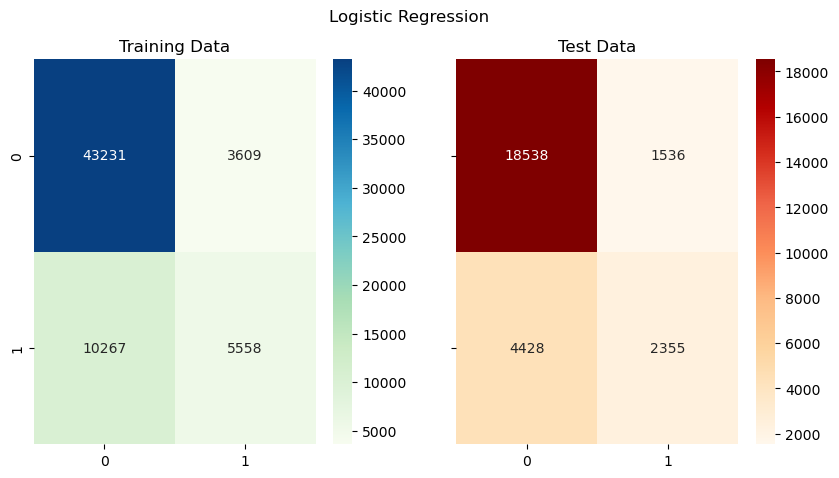

In [104]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize=(10, 5))

#Plotting confusion matrix for the Training Data and Test data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, ytrain_predict)),annot=True,fmt='.5g',cmap='GnBu',ax=a[0][0]);
a[0][0].set_title('Training Data');

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, ytest_predict)),annot=True,fmt='.5g',cmap='OrRd',ax=a[0][1]);
a[0][1].set_title('Test Data');

plt.suptitle('Logistic Regression');

#plt.savefig('plots2/LDA_CM.png')

AUC for the Training Data: 0.806
AUC for the Test Data: 0.803


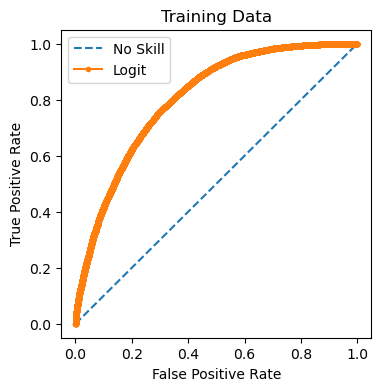

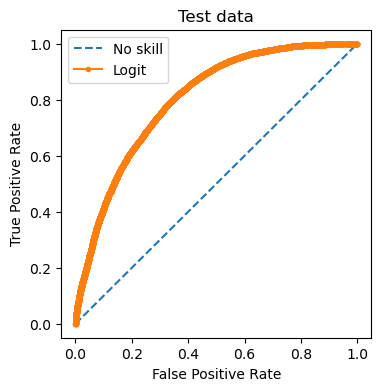

In [105]:
# AUC and ROC for the training and testing data
# Training Data Probability Prediction
pred_prob_train = LR_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = LR_model.predict_proba(X_test)

# AUC and ROC for the train data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.figure(figsize=(4,4))
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Logit')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.title('Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.figure(figsize=(4,4))
plt.plot([0, 1], [0, 1], linestyle='--', label= 'No skill')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Logit')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.title('Test data')

# save and show the plot
#plt.savefig('plots2/LDA_ROC.png')
plt.show()

### Model 2: Linear discriminant Analysis

In [106]:
# invoke the LogisticRegression function and find the bestfit model on training data
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)
LDA_model.get_params()

{'covariance_estimator': None,
 'n_components': None,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

In [107]:
## Performance Matrix on train data set
ytrain_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print('\n \033[1m Train Accuracy Score : \033[0m', model_score)
print('\n \033[1m Train Confusion Matrix :  \033[0m \n', metrics.confusion_matrix(y_train, ytrain_predict))
print('\n \033[1m Train Classification Report : \033[0m \n', metrics.classification_report(y_train, ytrain_predict))


  Train Accuracy Score :  0.7858134524854384

  Train Confusion Matrix :   
 [[43790  3050]
 [10372  5453]]

  Train Classification Report :  
               precision    recall  f1-score   support

           0       0.81      0.93      0.87     46840
           1       0.64      0.34      0.45     15825

    accuracy                           0.79     62665
   macro avg       0.72      0.64      0.66     62665
weighted avg       0.77      0.79      0.76     62665



In [108]:
## Performance Matrix on test data set
ytest_predict = LDA_model.predict(X_test)
test_model_score = LDA_model.score(X_test, y_test)
print('\n \033[1m Test Accuracy Score : \033[0m', test_model_score)
print('\n \033[1m Test Confusion Matrix :  \033[0m \n', metrics.confusion_matrix(y_test, ytest_predict))
print('\n \033[1m Test Classification Report : \033[0m \n', metrics.classification_report(y_test, ytest_predict))


  Test Accuracy Score :  0.7818818185203112

  Test Confusion Matrix :   
 [[18751  1323]
 [ 4535  2248]]

  Test Classification Report :  
               precision    recall  f1-score   support

           0       0.81      0.93      0.86     20074
           1       0.63      0.33      0.43      6783

    accuracy                           0.78     26857
   macro avg       0.72      0.63      0.65     26857
weighted avg       0.76      0.78      0.76     26857



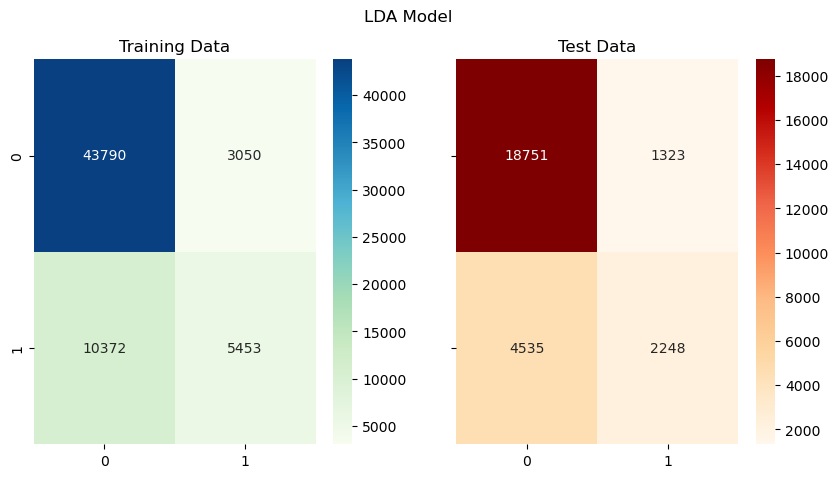

In [109]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize=(10, 5))

#Plotting confusion matrix for the Training Data and Test data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, ytrain_predict)),annot=True,fmt='.5g',cmap='GnBu',ax=a[0][0]);
a[0][0].set_title('Training Data');

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, ytest_predict)),annot=True,fmt='.5g',cmap='OrRd',ax=a[0][1]);
a[0][1].set_title('Test Data');

plt.suptitle('LDA Model');

#plt.savefig('plots2/LDA_CM.png')

AUC for the Training Data: 0.821
AUC for the Test Data: 0.817


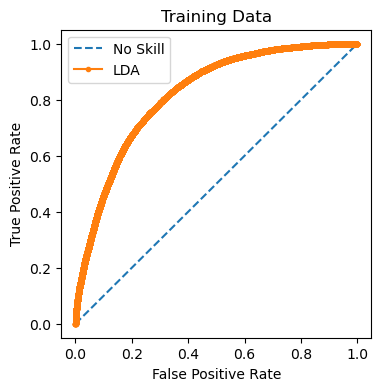

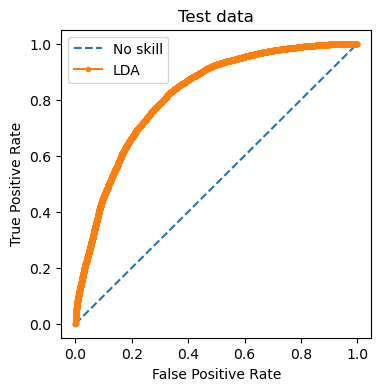

In [110]:
# AUC and ROC for the training and testing data
# Training Data Probability Prediction
pred_prob_train = LDA_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = LDA_model.predict_proba(X_test)

# AUC and ROC for the train data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.figure(figsize=(4,4))
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'LDA')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.title('Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.figure(figsize=(4,4))
plt.plot([0, 1], [0, 1], linestyle='--', label= 'No skill')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='LDA')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.title('Test data')

# save and show the plot
#plt.savefig('plots2/LDA_ROC.png')
plt.show()

### Model 3: KNN model

In [111]:
# invoke the LogisticRegression function and find the bestfit model on training data
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train, y_train)
KNN_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [112]:
## Performance Matrix on train data set
ytrain_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print('\n \033[1m Train Accuracy Score : \033[0m', model_score)
print('\n \033[1m Train Confusion Matrix :  \033[0m \n', metrics.confusion_matrix(y_train, ytrain_predict))
print('\n \033[1m Train Classification Report : \033[0m \n', metrics.classification_report(y_train, ytrain_predict))


  Train Accuracy Score :  0.8132609909838028

  Train Confusion Matrix :   
 [[43194  3646]
 [ 8056  7769]]

  Train Classification Report :  
               precision    recall  f1-score   support

           0       0.84      0.92      0.88     46840
           1       0.68      0.49      0.57     15825

    accuracy                           0.81     62665
   macro avg       0.76      0.71      0.73     62665
weighted avg       0.80      0.81      0.80     62665



In [113]:
## Performance Matrix on test data set
ytest_predict = KNN_model.predict(X_test)
test_model_score = KNN_model.score(X_test, y_test)
print('\n \033[1m Test Accuracy Score : \033[0m', test_model_score)
print('\n \033[1m Test Confusion Matrix :  \033[0m \n', metrics.confusion_matrix(y_test, ytest_predict))
print('\n \033[1m Test Classification Report : \033[0m \n', metrics.classification_report(y_test, ytest_predict))


  Test Accuracy Score :  0.7230144841195963

  Test Confusion Matrix :   
 [[17364  2710]
 [ 4729  2054]]

  Test Classification Report :  
               precision    recall  f1-score   support

           0       0.79      0.86      0.82     20074
           1       0.43      0.30      0.36      6783

    accuracy                           0.72     26857
   macro avg       0.61      0.58      0.59     26857
weighted avg       0.70      0.72      0.71     26857



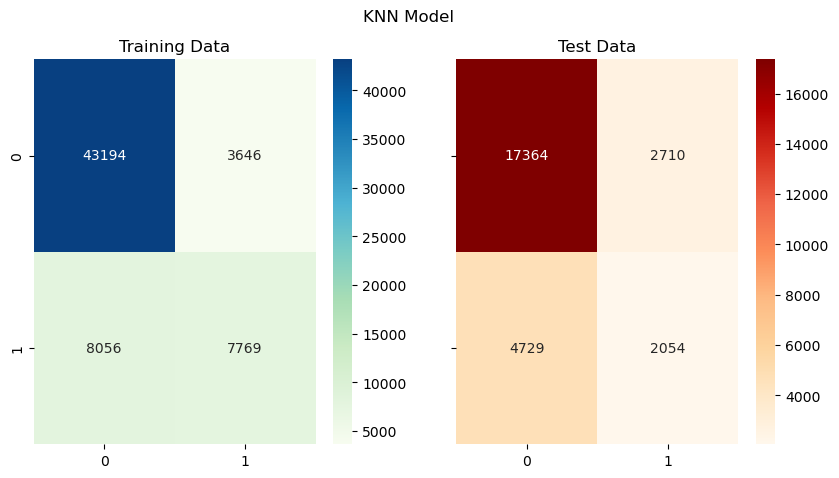

In [114]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize=(10, 5))

#Plotting confusion matrix for the Training Data and Test data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, ytrain_predict)),annot=True,fmt='.5g',cmap='GnBu',ax=a[0][0]);
a[0][0].set_title('Training Data');

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, ytest_predict)),annot=True,fmt='.5g',cmap='OrRd',ax=a[0][1]);
a[0][1].set_title('Test Data');

plt.suptitle('KNN Model');

#plt.savefig('plots2/LDA_CM.png')

AUC for the Training Data: 0.854
AUC for the Test Data: 0.668


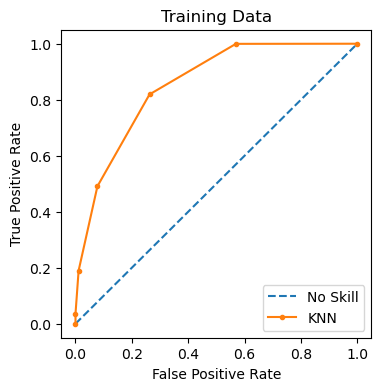

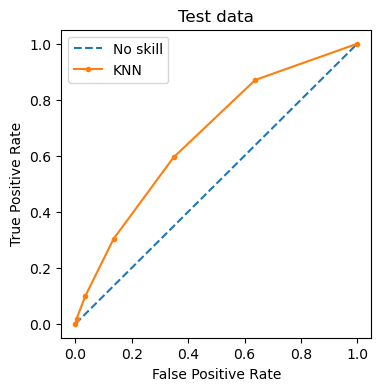

In [115]:
# AUC and ROC for the training and testing data
# Training Data Probability Prediction
pred_prob_train = KNN_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = KNN_model.predict_proba(X_test)

# AUC and ROC for the train data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.figure(figsize=(4,4))
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'KNN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.title('Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.figure(figsize=(4,4))
plt.plot([0, 1], [0, 1], linestyle='--', label= 'No skill')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='KNN')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.title('Test data')

# save and show the plot
#plt.savefig('plots2/LDA_ROC.png')
plt.show()

### Model 4: Naive Bayes 

In [116]:
# invoke the LogisticRegression function and find the bestfit model on training data
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
NB_model.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [117]:
## Performance Matrix on train data set
ytrain_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print('\n \033[1m Train Accuracy Score : \033[0m', model_score)
print('\n \033[1m Train Confusion Matrix :  \033[0m \n', metrics.confusion_matrix(y_train, ytrain_predict))
print('\n \033[1m Train Classification Report : \033[0m \n', metrics.classification_report(y_train, ytrain_predict))


  Train Accuracy Score :  0.611553498763265

  Train Confusion Matrix :   
 [[24892 21948]
 [ 2394 13431]]

  Train Classification Report :  
               precision    recall  f1-score   support

           0       0.91      0.53      0.67     46840
           1       0.38      0.85      0.52     15825

    accuracy                           0.61     62665
   macro avg       0.65      0.69      0.60     62665
weighted avg       0.78      0.61      0.63     62665



In [118]:
## Performance Matrix on test data set
ytest_predict = NB_model.predict(X_test)
test_model_score = NB_model.score(X_test, y_test)
print('\n \033[1m Test Accuracy Score : \033[0m', test_model_score)
print('\n \033[1m Test Confusion Matrix :  \033[0m \n', metrics.confusion_matrix(y_test, ytest_predict))
print('\n \033[1m Test Classification Report : \033[0m \n', metrics.classification_report(y_test, ytest_predict))


  Test Accuracy Score :  0.6130245373645604

  Test Confusion Matrix :   
 [[10688  9386]
 [ 1007  5776]]

  Test Classification Report :  
               precision    recall  f1-score   support

           0       0.91      0.53      0.67     20074
           1       0.38      0.85      0.53      6783

    accuracy                           0.61     26857
   macro avg       0.65      0.69      0.60     26857
weighted avg       0.78      0.61      0.64     26857



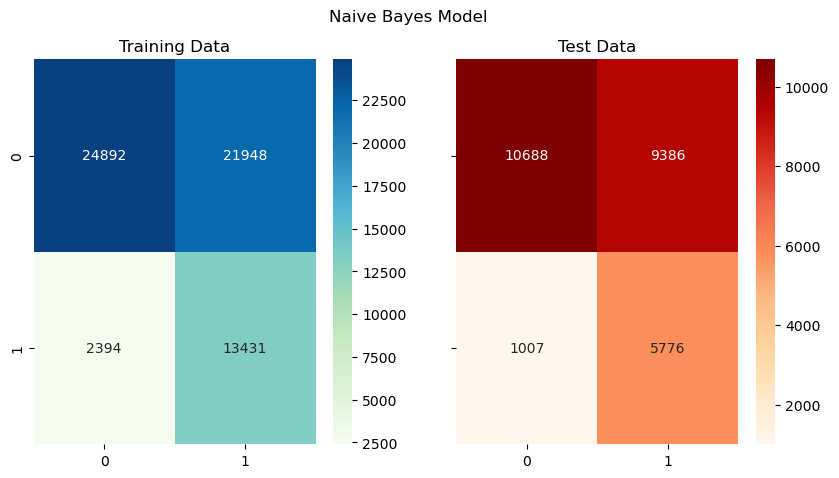

In [119]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize=(10, 5))

#Plotting confusion matrix for the Training Data and Test data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, ytrain_predict)),annot=True,fmt='.5g',cmap='GnBu',ax=a[0][0]);
a[0][0].set_title('Training Data');

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, ytest_predict)),annot=True,fmt='.5g',cmap='OrRd',ax=a[0][1]);
a[0][1].set_title('Test Data');

plt.suptitle('Naive Bayes Model');

#plt.savefig('plots2/LDA_CM.png')

AUC for the Training Data: 0.769
AUC for the Test Data: 0.771


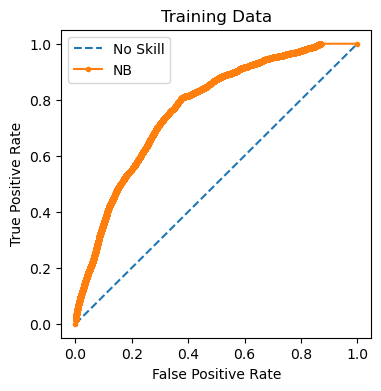

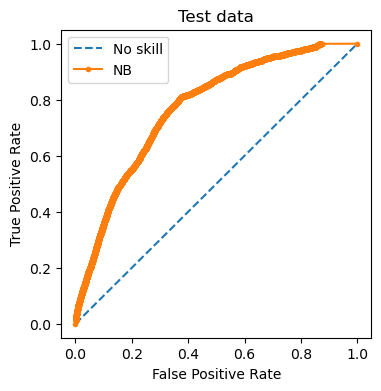

In [120]:
# AUC and ROC for the training and testing data
# Training Data Probability Prediction
pred_prob_train = NB_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = NB_model.predict_proba(X_test)

# AUC and ROC for the train data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.figure(figsize=(4,4))
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'NB')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.title('Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.figure(figsize=(4,4))
plt.plot([0, 1], [0, 1], linestyle='--', label= 'No skill')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='NB')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.title('Test data')

# save and show the plot
#plt.savefig('plots2/LDA_ROC.png')
plt.show()

### Model 5: Decision Tree

In [121]:
# invoke the LogisticRegression function and find the bestfit model on training data
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)
DT_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [122]:
## Performance Matrix on train data set
ytrain_predict = DT_model.predict(X_train)
model_score = DT_model.score(X_train, y_train)
print('\n \033[1m Train Accuracy Score : \033[0m', model_score)
print('\n \033[1m Train Confusion Matrix :  \033[0m \n', metrics.confusion_matrix(y_train, ytrain_predict))
print('\n \033[1m Train Classification Report : \033[0m \n', metrics.classification_report(y_train, ytrain_predict))


  Train Accuracy Score :  0.9974626984760233

  Train Confusion Matrix :   
 [[46825    15]
 [  144 15681]]

  Train Classification Report :  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     46840
           1       1.00      0.99      0.99     15825

    accuracy                           1.00     62665
   macro avg       1.00      1.00      1.00     62665
weighted avg       1.00      1.00      1.00     62665



In [123]:
## Performance Matrix on test data set
ytest_predict = DT_model.predict(X_test)
test_model_score = DT_model.score(X_test, y_test)
print('\n \033[1m Test Accuracy Score : \033[0m', test_model_score)
print('\n \033[1m Test Confusion Matrix :  \033[0m \n', metrics.confusion_matrix(y_test, ytest_predict))
print('\n \033[1m Test Classification Report : \033[0m \n', metrics.classification_report(y_test, ytest_predict))


  Test Accuracy Score :  0.7953606136202852

  Test Confusion Matrix :   
 [[17313  2761]
 [ 2735  4048]]

  Test Classification Report :  
               precision    recall  f1-score   support

           0       0.86      0.86      0.86     20074
           1       0.59      0.60      0.60      6783

    accuracy                           0.80     26857
   macro avg       0.73      0.73      0.73     26857
weighted avg       0.80      0.80      0.80     26857



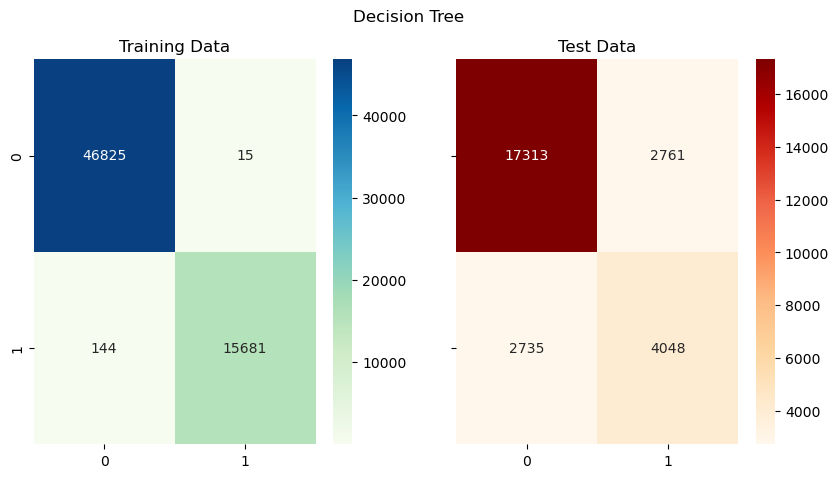

In [124]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize=(10, 5))

#Plotting confusion matrix for the Training Data and Test data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, ytrain_predict)),annot=True,fmt='.5g',cmap='GnBu',ax=a[0][0]);
a[0][0].set_title('Training Data');

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, ytest_predict)),annot=True,fmt='.5g',cmap='OrRd',ax=a[0][1]);
a[0][1].set_title('Test Data');

plt.suptitle('Decision Tree');

#plt.savefig('plots2/LDA_CM.png')

AUC for the Training Data: 1.000
AUC for the Test Data: 0.732


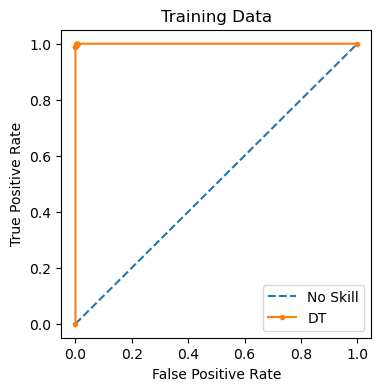

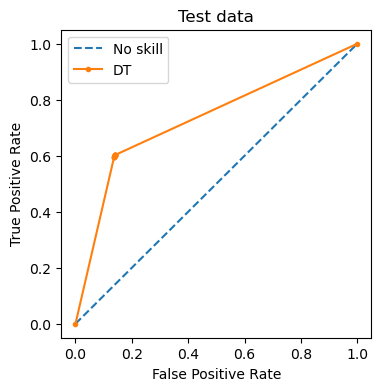

In [125]:
# AUC and ROC for the training and testing data
# Training Data Probability Prediction
pred_prob_train = DT_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = DT_model.predict_proba(X_test)

# AUC and ROC for the train data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.figure(figsize=(4,4))
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'DT')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.title('Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.figure(figsize=(4,4))
plt.plot([0, 1], [0, 1], linestyle='--', label= 'No skill')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='DT')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.title('Test data')

# save and show the plot
#plt.savefig('plots2/LDA_ROC.png')
plt.show()

### Model 6: Support Vector Machine

In [ ]:
# invoke the LogisticRegression function and find the bestfit model on training data
SVC_model = SVC(kernel="linear", probability=True)
SVC_model.fit(X_train, y_train)
SVC_model.get_params()

In [ ]:
## Performance Matrix on train data set
ytrain_predict = SVC_model.predict(X_train)
model_score = SVC_model.score(X_train, y_train)
print('\n \033[1m Train Accuracy Score : \033[0m', model_score)
print('\n \033[1m Train Confusion Matrix :  \033[0m \n', metrics.confusion_matrix(y_train, ytrain_predict))
print('\n \033[1m Train Classification Report : \033[0m \n', metrics.classification_report(y_train, ytrain_predict))

In [ ]:
## Performance Matrix on test data set
ytest_predict = SVC_model.predict(X_test)
test_model_score = SVC_model.score(X_test, y_test)
print('\n \033[1m Test Accuracy Score : \033[0m', test_model_score)
print('\n \033[1m Test Confusion Matrix :  \033[0m \n', metrics.confusion_matrix(y_test, ytest_predict))
print('\n \033[1m Test Classification Report : \033[0m \n', metrics.classification_report(y_test, ytest_predict))

In [ ]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize=(10, 5))

#Plotting confusion matrix for the Training Data and Test data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, ytrain_predict)),annot=True,fmt='.5g',cmap='GnBu',ax=a[0][0]);
a[0][0].set_title('Training Data');

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, ytest_predict)),annot=True,fmt='.5g',cmap='OrRd',ax=a[0][1]);
a[0][1].set_title('Test Data');

plt.suptitle('Support Vector Machine');

#plt.savefig('plots2/LDA_CM.png')

In [ ]:
# AUC and ROC for the training and testing data

# AUC and ROC for the train data

# calculate AUC
decision_scores = SVC_model.decision_function(X_train)
fpr, tpr, thres = roc_curve(y_train, decision_scores)
print('AUC for the Training Data:: {:.3f}'.format(roc_auc_score(y_train, decision_scores)))

#  calculate roc curve
plt.plot(fpr, tpr, "b", label='Linear SVM')
plt.plot([0,1],[0,1], "k--", label='No Skill')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()
# AUC and ROC for the test data

# calculate AUC
decision_scores = SVC_model.decision_function(X_test)
fpr, tpr, thres = roc_curve(y_test, decision_scores)
print('AUC for the Testing Data:: {:.3f}'.format(roc_auc_score(y_test, decision_scores)))

#  calculate roc curve
plt.plot(fpr, tpr, "b", label='Linear SVM')
plt.plot([0,1],[0,1], "k--", label='No Skill')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")


# save and show the plot
#plt.savefig('plots2/LDA_ROC.png')
plt.show()

### Model 7: Artificial Neural Network

In [ ]:
# invoke the LogisticRegression function and find the bestfit model on training data
ANN_model = MLPClassifier()
ANN_model.fit(X_train, y_train)
ANN_model.get_params()

In [ ]:
## Performance Matrix on train data set
ytrain_predict = ANN_model.predict(X_train)
model_score = ANN_model.score(X_train, y_train)
print('\n \033[1m Train Accuracy Score : \033[0m', model_score)
print('\n \033[1m Train Confusion Matrix :  \033[0m \n', metrics.confusion_matrix(y_train, ytrain_predict))
print('\n \033[1m Train Classification Report : \033[0m \n', metrics.classification_report(y_train, ytrain_predict))

In [ ]:
## Performance Matrix on test data set
ytest_predict = ANN_model.predict(X_test)
test_model_score = ANN_model.score(X_test, y_test)
print('\n \033[1m Test Accuracy Score : \033[0m', test_model_score)
print('\n \033[1m Test Confusion Matrix :  \033[0m \n', metrics.confusion_matrix(y_test, ytest_predict))
print('\n \033[1m Test Classification Report : \033[0m \n', metrics.classification_report(y_test, ytest_predict))

In [ ]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize=(10, 5))

#Plotting confusion matrix for the Training Data and Test data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, ytrain_predict)),annot=True,fmt='.5g',cmap='GnBu',ax=a[0][0]);
a[0][0].set_title('Training Data');

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, ytest_predict)),annot=True,fmt='.5g',cmap='OrRd',ax=a[0][1]);
a[0][1].set_title('Test Data');

plt.suptitle('Artificial Neural Network model');

#plt.savefig('plots2/LDA_CM.png')

In [ ]:
# AUC and ROC for the training and testing data
# Training Data Probability Prediction
pred_prob_train = ANN_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = ANN_model.predict_proba(X_test)

# AUC and ROC for the train data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.figure(figsize=(4,4))
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'ANN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.title('Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.figure(figsize=(4,4))
plt.plot([0, 1], [0, 1], linestyle='--', label= 'No skill')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='ANN')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.title('Test data')

# save and show the plot
#plt.savefig('plots2/LDA_ROC.png')
plt.show()

### Model 8: Random Forest

In [ ]:
# invoke the LogisticRegression function and find the bestfit model on training data
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)
RF_model.get_params()

In [ ]:
## Performance Matrix on train data set
ytrain_predict = RF_model.predict(X_train)
model_score = RF_model.score(X_train, y_train)
print('\n \033[1m Train Accuracy Score : \033[0m', model_score)
print('\n \033[1m Train Confusion Matrix :  \033[0m \n', metrics.confusion_matrix(y_train, ytrain_predict))
print('\n \033[1m Train Classification Report : \033[0m \n', metrics.classification_report(y_train, ytrain_predict))

In [ ]:
## Performance Matrix on test data set
ytest_predict = RF_model.predict(X_test)
test_model_score = RF_model.score(X_test, y_test)
print('\n \033[1m Test Accuracy Score : \033[0m', test_model_score)
print('\n \033[1m Test Confusion Matrix :  \033[0m \n', metrics.confusion_matrix(y_test, ytest_predict))
print('\n \033[1m Test Classification Report : \033[0m \n', metrics.classification_report(y_test, ytest_predict))

In [ ]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize=(10, 5))

#Plotting confusion matrix for the Training Data and Test data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, ytrain_predict)),annot=True,fmt='.5g',cmap='GnBu',ax=a[0][0]);
a[0][0].set_title('Training Data');

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, ytest_predict)),annot=True,fmt='.5g',cmap='OrRd',ax=a[0][1]);
a[0][1].set_title('Test Data');

plt.suptitle('Random Forest');

#plt.savefig('plots2/LDA_CM.png')

In [ ]:
# AUC and ROC for the training and testing data
# Training Data Probability Prediction
pred_prob_train = RF_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = RF_model.predict_proba(X_test)

# AUC and ROC for the train data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.figure(figsize=(4,4))
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'RF')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.title('Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.figure(figsize=(4,4))
plt.plot([0, 1], [0, 1], linestyle='--', label= 'No skill')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='RF')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.title('Test data')

# save and show the plot
#plt.savefig('plots2/LDA_ROC.png')
plt.show()

### Model 9: Bagging Classifier

In [ ]:
# invoke the LogisticRegression function and find the bestfit model on training data
BGC_model = BaggingClassifier()
BGC_model.fit(X_train, y_train)
BGC_model.get_params()

In [ ]:
## Performance Matrix on train data set
ytrain_predict = BGC_model.predict(X_train)
model_score = BGC_model.score(X_train, y_train)
print('\n \033[1m Train Accuracy Score : \033[0m', model_score)
print('\n \033[1m Train Confusion Matrix :  \033[0m \n', metrics.confusion_matrix(y_train, ytrain_predict))
print('\n \033[1m Train Classification Report : \033[0m \n', metrics.classification_report(y_train, ytrain_predict))

In [ ]:
## Performance Matrix on test data set
ytest_predict = BGC_model.predict(X_test)
test_model_score = BGC_model.score(X_test, y_test)
print('\n \033[1m Test Accuracy Score : \033[0m', test_model_score)
print('\n \033[1m Test Confusion Matrix :  \033[0m \n', metrics.confusion_matrix(y_test, ytest_predict))
print('\n \033[1m Test Classification Report : \033[0m \n', metrics.classification_report(y_test, ytest_predict))

In [ ]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize=(10, 5))

#Plotting confusion matrix for the Training Data and Test data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, ytrain_predict)),annot=True,fmt='.5g',cmap='GnBu',ax=a[0][0]);
a[0][0].set_title('Training Data');

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, ytest_predict)),annot=True,fmt='.5g',cmap='OrRd',ax=a[0][1]);
a[0][1].set_title('Test Data');

plt.suptitle('Bagging Classifier Model');

#plt.savefig('plots2/LDA_CM.png')

In [ ]:
# AUC and ROC for the training and testing data
# Training Data Probability Prediction
pred_prob_train = BGC_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = BGC_model.predict_proba(X_test)

# AUC and ROC for the train data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.figure(figsize=(4,4))
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Bagged')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.title('Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.figure(figsize=(4,4))
plt.plot([0, 1], [0, 1], linestyle='--', label= 'No skill')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Bagged')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.title('Test data')

# save and show the plot
#plt.savefig('plots2/LDA_ROC.png')
plt.show()

### Model 10: Gradient Boosting Classifier

In [ ]:
# invoke the LogisticRegression function and find the bestfit model on training data
GBC_model = GradientBoostingClassifier()
GBC_model.fit(X_train, y_train)
GBC_model.get_params()

In [ ]:
## Performance Matrix on train data set
ytrain_predict = GBC_model.predict(X_train)
model_score = GBC_model.score(X_train, y_train)
print('\n \033[1m Train Accuracy Score : \033[0m', model_score)
print('\n \033[1m Train Confusion Matrix :  \033[0m \n', metrics.confusion_matrix(y_train, ytrain_predict))
print('\n \033[1m Train Classification Report : \033[0m \n', metrics.classification_report(y_train, ytrain_predict))

In [ ]:
## Performance Matrix on test data set
ytest_predict = GBC_model.predict(X_test)
test_model_score = GBC_model.score(X_test, y_test)
print('\n \033[1m Test Accuracy Score : \033[0m', test_model_score)
print('\n \033[1m Test Confusion Matrix :  \033[0m \n', metrics.confusion_matrix(y_test, ytest_predict))
print('\n \033[1m Test Classification Report : \033[0m \n', metrics.classification_report(y_test, ytest_predict))

In [ ]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize=(10, 5))

#Plotting confusion matrix for the Training Data and Test data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, ytrain_predict)),annot=True,fmt='.5g',cmap='GnBu',ax=a[0][0]);
a[0][0].set_title('Training Data');

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, ytest_predict)),annot=True,fmt='.5g',cmap='OrRd',ax=a[0][1]);
a[0][1].set_title('Test Data');

plt.suptitle('Gradient Boosting Classifier');

#plt.savefig('plots2/LDA_CM.png')

In [ ]:
# AUC and ROC for the training and testing data
# Training Data Probability Prediction
pred_prob_train = GBC_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = GBC_model.predict_proba(X_test)

# AUC and ROC for the train data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.figure(figsize=(4,4))
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Boosted')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.title('Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.figure(figsize=(4,4))
plt.plot([0, 1], [0, 1], linestyle='--', label= 'No skill')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Boosted')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.title('Test data')

# save and show the plot
#plt.savefig('plots2/LDA_ROC.png')
plt.show()

## Model Tuning

In [ ]:
# Tuned LR Model
dual=[True,False]
max_iter=[100,150,200]
solver = ['newton-cg', 'lbfgs', 'liblinear']
tol = [0.1, 0.01, 0.001]
param_grid = dict(dual=dual,
                  max_iter=max_iter, 
                  solver=solver, 
                  tol=tol)

import time

lr = LogisticRegression(penalty='l2')
LR_tuned_grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 5, n_jobs=-1)

start_time = time.time()
grid_result = LR_tuned_grid.fit(X_train, y_train)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

In [ ]:
## Performance Metrics on train data set
y_train_predict = LR_tuned_grid.predict(X_train)
model_score = LR_tuned_grid.score(X_train, y_train)
print('\n \033[1m Train Accuracy Score : \033[0m', model_score)
print('\n \033[1m Train Confusion Matrix :  \033[0m \n', metrics.confusion_matrix(y_train, y_train_predict))
print('\n \033[1m Train Classification Report : \033[0m \n', metrics.classification_report(y_train, y_train_predict))

In [ ]:
## Performance Metrics on test data set
y_test_predict = LR_tuned_grid.predict(X_test)
test_model_score = LR_tuned_grid.score(X_test, y_test)
print('\n \033[1m Test Accuracy Score : \033[0m', test_model_score)
print('\n \033[1m Test Confusion Matrix :  \033[0m \n', metrics.confusion_matrix(y_test, y_test_predict))
print('\n \033[1m Test Classification Report : \033[0m \n', metrics.classification_report(y_test, y_test_predict))

In [ ]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize=(10, 5))

#Plotting confusion matrix for the Training Data and Test data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, ytrain_predict)),annot=True,fmt='.5g',cmap='GnBu',ax=a[0][0]);
a[0][0].set_title('Training Data');

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, ytest_predict)),annot=True,fmt='.5g',cmap='OrRd',ax=a[0][1]);
a[0][1].set_title('Test Data');

plt.suptitle('Tuned Logistic Regression');

#plt.savefig('plots2/LDA_CM.png')

In [ ]:
# AUC and ROC for the training and testing data
# Training Data Probability Prediction
pred_prob_train = LR_tuned_grid.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = LR_tuned_grid.predict_proba(X_test)

# AUC and ROC for the train data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.figure(figsize=(4,4))
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Logit-Tuned')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.title('Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.figure(figsize=(4,4))
plt.plot([0, 1], [0, 1], linestyle='--', label= 'No skill')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Logit-Tuned')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.title('Test data')

# save and show the plot
#plt.savefig('plots2/LDA_ROC.png')
plt.show()

In [ ]:
# param_test = {'min_samples_split':range(1000,2100,200), 
#               'min_samples_leaf':range(30,71,10),
#               'max_depth':range(5,16,2),
#               'n_estimators':range(50,160,50),
#               'learning_rate':[0.1,0.01,0.001]}

# GBC_gsearch = GridSearchCV(estimator = GradientBoostingClassifier(max_features='sqrt', random_state=10), 
#                             param_grid = param_test, scoring='f1',n_jobs=-1, cv=5)

# GBC_gsearch.fit(X_train, y_train)

# GBC_gsearch.grid_scores_, GBC_gsearch.best_params_, GBC_gsearch.best_score_

## Feature Importance

In [ ]:
#Print Feature Importance:
feat_imp = pd.Series(GBC_model.feature_importances_, X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(12,4))
feat_imp.plot(kind='bar', title='Feature Importances')

plt.ylabel('Feature Importance Score')

### The End

In [ ]:
# !jupyter nbconvert --to script ISP_Hotel_Cancellation_Final.ipynb